In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
%cd '/content/drive/My Drive/Studies 2/Year 2/Final Project/project_git_repo/code'

/content/drive/My Drive/Studies 2/Year 2/Final Project/project_git_repo/code


In [ ]:
!pip install scanpy
!pip install stlearn 
!pip install matplotlib==3.4.3
!pip install preprocessing

In [2]:
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
import sys 

import os
from copy import deepcopy
import numpy as np
import pandas as pd
import stlearn as st

import torch
from torch.utils.data import TensorDataset
from sklearn.model_selection import train_test_split

module_path = os.path.abspath(os.path.join('../../FPST','code'))
if module_path not in sys.path:
    sys.path.append(module_path)

from load_data import Data, load_visium_data
from train import engine
from image_data import *
from models import NMF
from plot import plot_train_vs_test, plot_genes_read_count, plot_true_vs_reconstructed_histogram
from losses import RMSELossWithoutZeros

# choose the device 
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(device)

cuda


## Dataset Name

In [3]:
dataset_name = '../data/Visium_Mouse_Olfactory_Bulb'

## NMF- random spots- with zeros included in loss

In [ ]:
dataset, data = load_visium_data(dataset_name, min_cells=177, min_counts=10)

/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
params = {
    'learning_rate': 0.1,
    'optimizer': "SGD",
    'latent_dim': 40,
    'batch_size': 128
}

In [ ]:
number_of_spots = data.n_obs
number_of_genes = data.n_vars
nmf_model = NMF(data.n_vars, data.n_obs, params)

In [ ]:
nmf_execute = engine(model = nmf_model,
                    model_name = 'NMF',
                    params = params,
                    epochs = 300,
                    dl_train = dataset.dl_train,
                    dl_valid = dataset.dl_valid,
                    dl_test = dataset.dl_test, 
                    device = device)

NMF(
  (embedding_genes): Embedding(9529, 40)
  (embedding_spots): Embedding(1186, 40)
)


In [ ]:
nmf_train_losses, nmf_test_losses = nmf_execute.execute()

Train epoch 0/300: 100%|██████████| 71449/71449 [05:07<00:00, 232.67it/s]


Epoch #0 Train Loss: 0.8985438999437513
Epoch #0 Validation Loss: 0.8747017576937133


Train epoch 1/300: 100%|██████████| 71449/71449 [05:14<00:00, 226.85it/s]


Epoch #1 Train Loss: 0.7754693976342443
Epoch #1 Validation Loss: 0.6881942565280272


Train epoch 2/300: 100%|██████████| 71449/71449 [05:29<00:00, 217.10it/s]


Epoch #2 Train Loss: 0.6789953859330004
Epoch #2 Validation Loss: 0.6130799893221771


Train epoch 3/300: 100%|██████████| 71449/71449 [05:30<00:00, 216.21it/s]


Epoch #3 Train Loss: 0.6250286851453801
Epoch #3 Validation Loss: 0.5717267785334534


Train epoch 4/300: 100%|██████████| 71449/71449 [05:44<00:00, 207.42it/s]


Epoch #4 Train Loss: 0.5901624882897996
Epoch #4 Validation Loss: 0.5452942133400097


Train epoch 5/300: 100%|██████████| 71449/71449 [05:47<00:00, 205.37it/s]


Epoch #5 Train Loss: 0.5655829165164842
Epoch #5 Validation Loss: 0.5267739797277686


Train epoch 6/300: 100%|██████████| 71449/71449 [05:58<00:00, 199.23it/s]


Epoch #6 Train Loss: 0.5471441731912738
Epoch #6 Validation Loss: 0.5128748206305397


Train epoch 7/300: 100%|██████████| 71449/71449 [06:12<00:00, 191.85it/s]


Epoch #7 Train Loss: 0.5325879519661835
Epoch #7 Validation Loss: 0.5018186403542718


Train epoch 8/300: 100%|██████████| 71449/71449 [06:26<00:00, 184.81it/s]


Epoch #8 Train Loss: 0.5206009622368796
Epoch #8 Validation Loss: 0.49264266655448735


Train epoch 9/300: 100%|██████████| 71449/71449 [06:39<00:00, 178.62it/s]


Epoch #9 Train Loss: 0.5104697152579655
Epoch #9 Validation Loss: 0.48488846093145593
Early stopping


### Plot train and test vs epochs

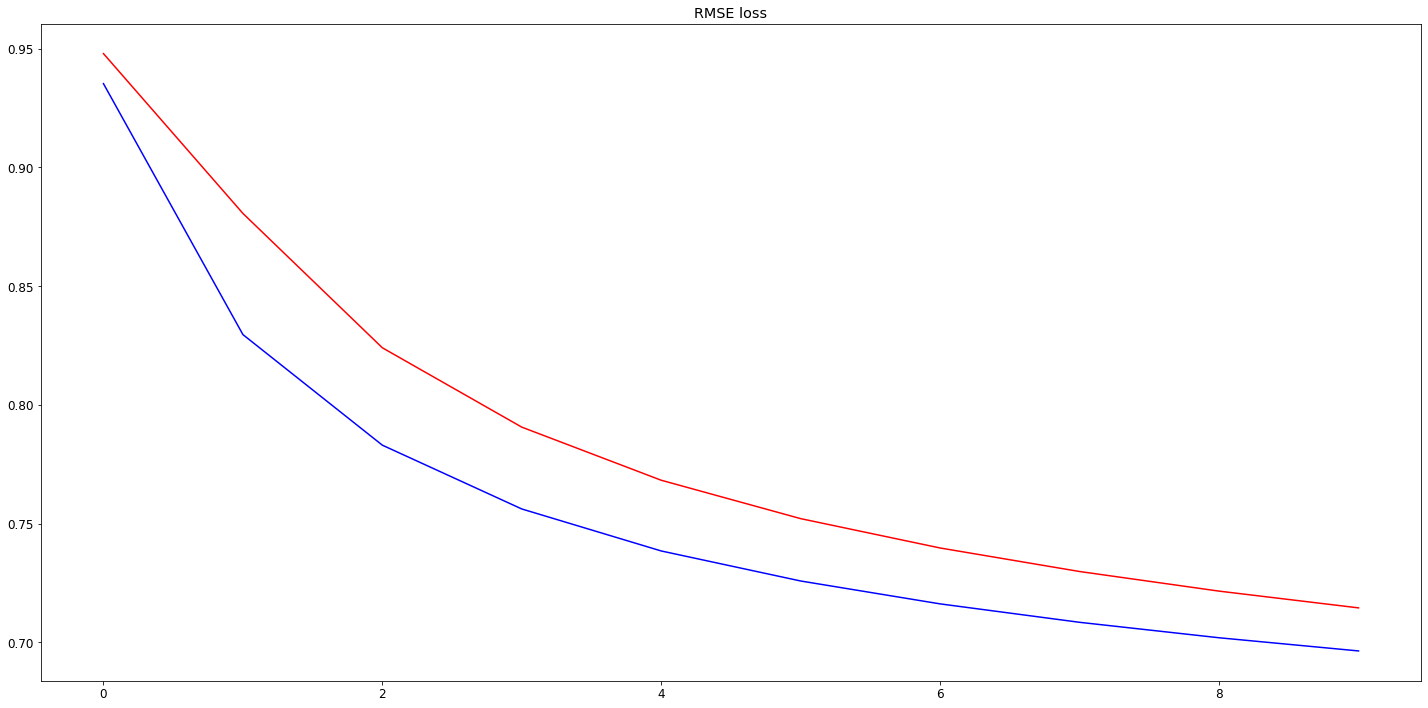

In [ ]:
plot_train_vs_test(nmf_train_losses, nmf_test_losses, "RMSE loss")

### Reconstruct data

In [ ]:
df_expressions_preds, df_expressions_true, reconstructed_data = engine.create_reconstructed_data(nmf_model, dataset, data, device)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


  (0, 3964)	1.0
  (0, 1760)	2.0
  (0, 8731)	1.0
  (0, 2402)	1.0
  (0, 6825)	1.0
  (0, 3744)	1.0
  (0, 3746)	1.0
  (0, 5969)	1.0
  (0, 6350)	1.0
  (0, 1531)	1.0
  (0, 7469)	1.0
  (0, 4043)	1.0
  (0, 7871)	1.0
  (0, 4654)	1.0
  (0, 5184)	1.0
  (0, 3325)	1.0
  (0, 1186)	1.0
  (0, 3164)	1.0
  (0, 3072)	1.0
  (0, 6163)	1.0
  (0, 5250)	1.0
  (0, 4762)	1.0
  (0, 4660)	1.0
  (0, 5647)	1.0
  (0, 5746)	2.0
  :	:
  (1184, 4463)	3.0
  (1184, 7282)	1.0
  (1184, 5687)	11.0
  (1184, 1418)	1.0
  (1184, 6630)	1.0
  (1184, 6555)	2.0
  (1184, 3306)	6.0
  (1184, 6458)	1.0
  (1184, 8425)	24.0
  (1184, 6224)	3.0
  (1184, 3484)	1.0
  (1184, 9521)	196.0
  (1184, 9522)	125.0
  (1184, 9517)	891.0
  (1184, 9518)	499.0
  (1184, 9516)	3.0
  (1184, 9515)	524.0
  (1184, 9519)	682.0
  (1184, 9523)	42.0
  (1184, 9525)	6.0
  (1184, 9524)	260.0
  (1184, 9526)	36.0
  (1184, 9520)	295.0
  (1184, 8952)	1.0
  (1184, 138)	2.0 [[0.02868801 0.07380491 0.08821544 ... 0.3967481  0.77319461 0.03999201]
 [0.50262177 0.4085443  0.3

/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


### Cluster and plot reconstructed data

Normalization step is finished in adata.X
PCA is done! Generated in adata.obsm['X_pca'], adata.uns['pca'] and adata.varm['PCs']
Applying Kmeans clustering ...
Kmeans clustering is done! The labels are stored in adata.obs["kmeans"]


<Figure size 1440x720 with 0 Axes>

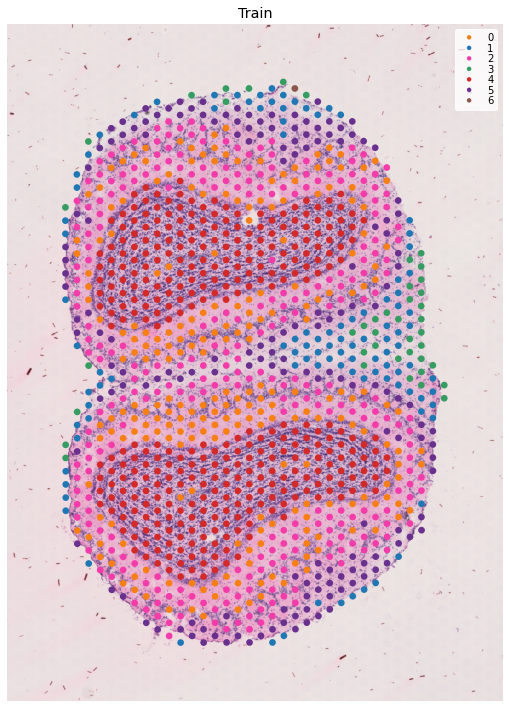

In [ ]:
engine.cluster_reconstructed_data(reconstructed_data)

## NMF- random spots- without zeros in loss

In [ ]:
dataset, data = load_visium_data(dataset_name, min_cells=177, min_counts=10)

/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
params = {
    'learning_rate': 0.1,
    'optimizer': "SGD",
    'latent_dim': 40,
    'batch_size': 128
}

In [ ]:
number_of_spots = data.n_obs
number_of_genes = data.n_vars
nmf_model = NMF(data.n_vars, data.n_obs, params)

In [ ]:
nmf_execute = engine(model = nmf_model,
                    model_name = 'NMF',
                    params = params,
                    epochs = 300,
                    criterion = RMSELossWithoutZeros(),
                    dl_train = dataset.dl_train,
                    dl_valid = dataset.dl_valid,
                    dl_test = dataset.dl_test,
                    device = device)

NMF(
  (embedding_genes): Embedding(9529, 40)
  (embedding_spots): Embedding(1186, 40)
)


In [ ]:
nmf_train_losses, nmf_test_losses = nmf_execute.execute()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Train epoch 0/300: 100%|██████████| 71449/71449 [05:29<00:00, 216.54it/s]


Epoch #0 Train Loss: 1.1521052741030045
Epoch #0 Validation Loss: 1.147531072122333


Train epoch 1/300: 100%|██████████| 71449/71449 [05:41<00:00, 208.96it/s]


Epoch #1 Train Loss: 1.0704827939186201
Epoch #1 Validation Loss: 0.9165556255658006


Train epoch 2/300: 100%|██████████| 71449/71449 [05:55<00:00, 200.90it/s]


Epoch #2 Train Loss: 0.9364690321733107
Epoch #2 Validation Loss: 0.8196820852841413


Train epoch 3/300: 100%|██████████| 71449/71449 [06:03<00:00, 196.49it/s]


Epoch #3 Train Loss: 0.8608240065969851
Epoch #3 Validation Loss: 0.7662856482547149


Train epoch 4/300: 100%|██████████| 71449/71449 [06:09<00:00, 193.21it/s]


Epoch #4 Train Loss: 0.8115059482168234
Epoch #4 Validation Loss: 0.7315387322809295


Train epoch 5/300: 100%|██████████| 71449/71449 [06:20<00:00, 187.92it/s]


Epoch #5 Train Loss: 0.775964065060218
Epoch #5 Validation Loss: 0.7063929424980632


Train epoch 6/300: 100%|██████████| 71449/71449 [06:27<00:00, 184.48it/s]


Epoch #6 Train Loss: 0.7488622012838246
Epoch #6 Validation Loss: 0.6873965801200425


Train epoch 7/300: 100%|██████████| 71449/71449 [06:45<00:00, 176.25it/s]


Epoch #7 Train Loss: 0.7275309247606331
Epoch #7 Validation Loss: 0.6725221240074771


Train epoch 8/300: 100%|██████████| 71449/71449 [06:52<00:00, 173.01it/s]


Epoch #8 Train Loss: 0.710261000927014
Epoch #8 Validation Loss: 0.6605213670795265


Train epoch 9/300: 100%|██████████| 71449/71449 [07:10<00:00, 166.12it/s]


Epoch #9 Train Loss: 0.6959723099067862
Epoch #9 Validation Loss: 0.650658923398876


Train epoch 10/300: 100%|██████████| 71449/71449 [07:20<00:00, 162.06it/s]


Epoch #10 Train Loss: 0.6839515377023659
Epoch #10 Validation Loss: 0.6424003791969332
Early stopping


### Plot train and test vs epochs

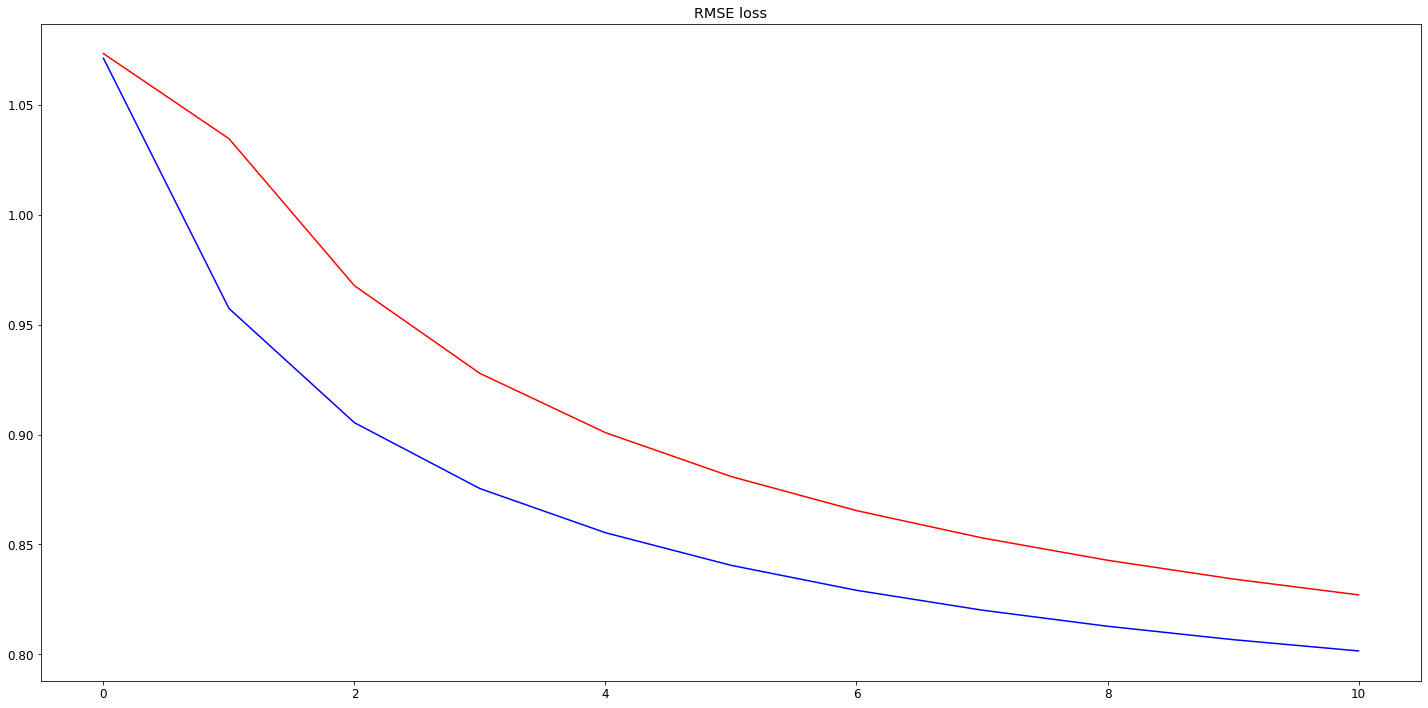

In [ ]:
plot_train_vs_test(nmf_train_losses, nmf_test_losses, "RMSE loss")

### Reconstruct data

In [ ]:
df_expressions_preds, df_expressions_true, reconstructed_data = engine.create_reconstructed_data(nmf_model, dataset, data, device)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


  (0, 3964)	1.0
  (0, 1760)	2.0
  (0, 8731)	1.0
  (0, 2402)	1.0
  (0, 6825)	1.0
  (0, 3744)	1.0
  (0, 3746)	1.0
  (0, 5969)	1.0
  (0, 6350)	1.0
  (0, 1531)	1.0
  (0, 7469)	1.0
  (0, 4043)	1.0
  (0, 7871)	1.0
  (0, 4654)	1.0
  (0, 5184)	1.0
  (0, 3325)	1.0
  (0, 1186)	1.0
  (0, 3164)	1.0
  (0, 3072)	1.0
  (0, 6163)	1.0
  (0, 5250)	1.0
  (0, 4762)	1.0
  (0, 4660)	1.0
  (0, 5647)	1.0
  (0, 5746)	2.0
  :	:
  (1184, 4463)	3.0
  (1184, 7282)	1.0
  (1184, 5687)	11.0
  (1184, 1418)	1.0
  (1184, 6630)	1.0
  (1184, 6555)	2.0
  (1184, 3306)	6.0
  (1184, 6458)	1.0
  (1184, 8425)	24.0
  (1184, 6224)	3.0
  (1184, 3484)	1.0
  (1184, 9521)	196.0
  (1184, 9522)	125.0
  (1184, 9517)	891.0
  (1184, 9518)	499.0
  (1184, 9516)	3.0
  (1184, 9515)	524.0
  (1184, 9519)	682.0
  (1184, 9523)	42.0
  (1184, 9525)	6.0
  (1184, 9524)	260.0
  (1184, 9526)	36.0
  (1184, 9520)	295.0
  (1184, 8952)	1.0
  (1184, 138)	2.0 [[0.44888172 0.43568966 0.32613456 ... 1.02338374 1.59869766 0.42284593]
 [0.87825018 0.86138552 0.9

/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


### Cluster and plot reconstructed data

Normalization step is finished in adata.X
PCA is done! Generated in adata.obsm['X_pca'], adata.uns['pca'] and adata.varm['PCs']
Applying Kmeans clustering ...
Kmeans clustering is done! The labels are stored in adata.obs["kmeans"]


<Figure size 1440x720 with 0 Axes>

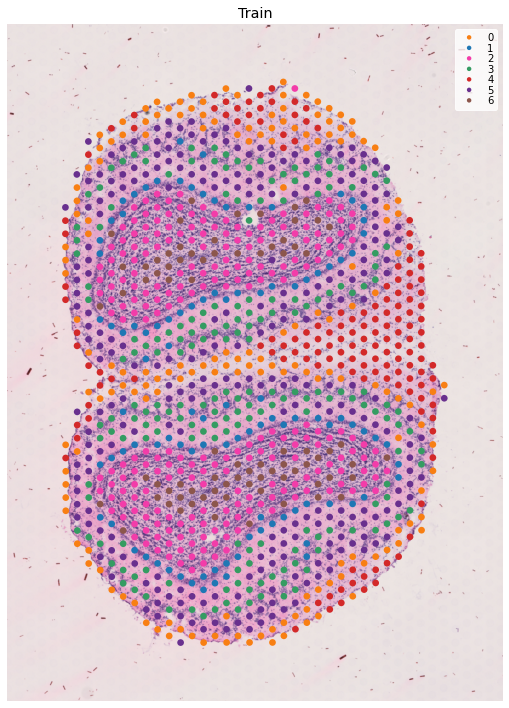

In [ ]:
engine.cluster_reconstructed_data(reconstructed_data)

## NMF- data per spot

In [ ]:
dataset, data = load_visium_data(dataset_name, 'spots_data', min_cells=177, min_counts=10)

/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
params = {
    'learning_rate': 0.1,
    'optimizer': "SGD",
    'latent_dim': 40,
    'batch_size': 128
}

In [ ]:
number_of_spots = data.n_obs
number_of_genes = data.n_vars
nmf_model = NMF(number_of_genes, number_of_spots, params)

In [ ]:
nmf_execute = engine(model = nmf_model,
                    model_name = 'NMF',
                    params = params,
                    epochs = 300,
                    criterion = RMSELossWithoutZeros(),
                    dl_train = dataset.dl_train,
                    dl_valid = dataset.dl_valid,
                    dl_test = dataset.dl_test, 
                    device = device)

NMF(
  (embedding_genes): Embedding(9529, 40)
  (embedding_spots): Embedding(1186, 40)
)


In [ ]:
nmf_train_losses, nmf_test_losses = nmf_execute.execute()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Train epoch 0/300: 100%|██████████| 90421/90421 [07:05<00:00, 212.48it/s]


Epoch #0 Train Loss: 1.0156900412463645
Epoch #0 Validation Loss: 1.108989608848763


Train epoch 1/300: 100%|██████████| 90421/90421 [07:39<00:00, 196.63it/s]


Epoch #1 Train Loss: 0.8548689795419744
Epoch #1 Validation Loss: 1.1088249412200513


Train epoch 2/300: 100%|██████████| 90421/90421 [07:57<00:00, 189.22it/s]


Epoch #2 Train Loss: 0.7708740545688771
Epoch #2 Validation Loss: 1.1087645692698347
Early stopping


### Plot train and test vs epochs

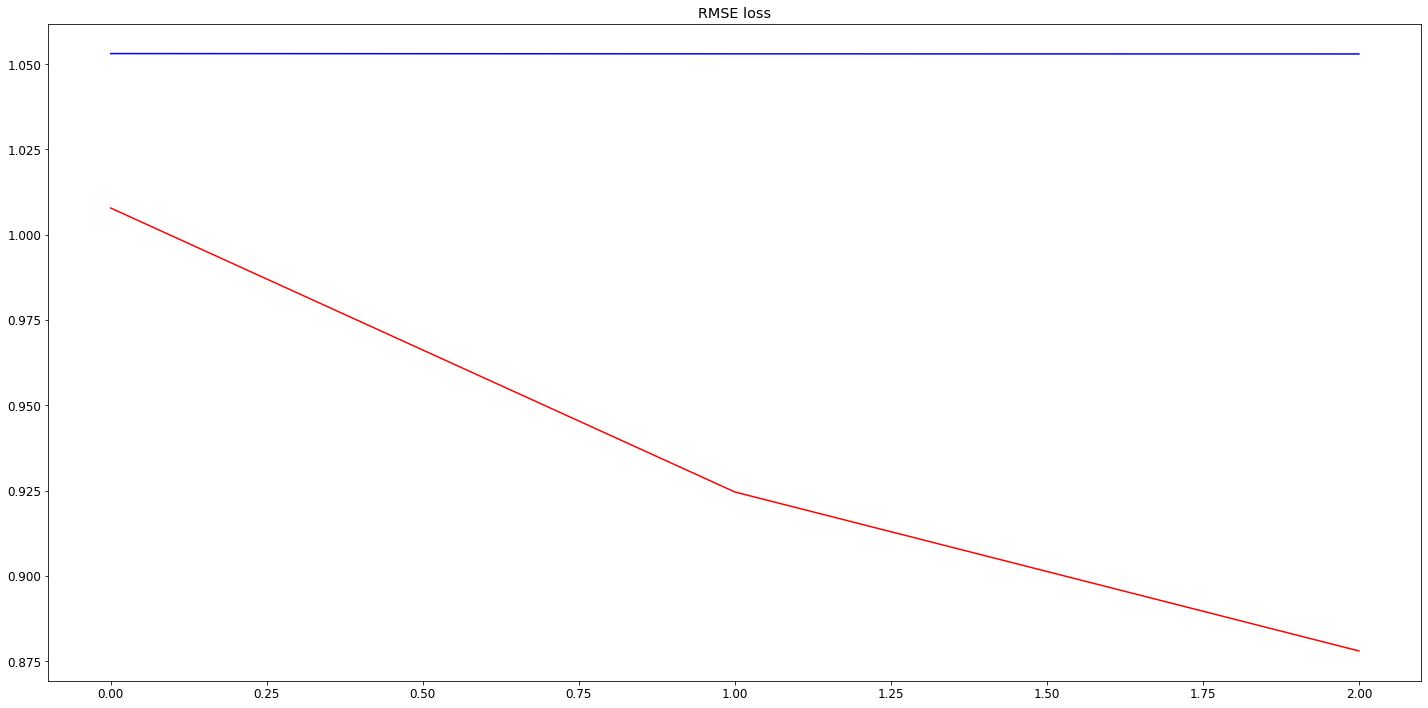

In [ ]:
plot_train_vs_test(nmf_train_losses, nmf_test_losses, "RMSE loss")

### Reconstruct data

In [ ]:
df_expressions_preds, df_expressions_true, reconstructed_data = engine.create_reconstructed_data(nmf_model, dataset, data, device)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


  (0, 3964)	1.0
  (0, 1760)	2.0
  (0, 8731)	1.0
  (0, 2402)	1.0
  (0, 6825)	1.0
  (0, 3744)	1.0
  (0, 3746)	1.0
  (0, 5969)	1.0
  (0, 6350)	1.0
  (0, 1531)	1.0
  (0, 7469)	1.0
  (0, 4043)	1.0
  (0, 7871)	1.0
  (0, 4654)	1.0
  (0, 5184)	1.0
  (0, 3325)	1.0
  (0, 1186)	1.0
  (0, 3164)	1.0
  (0, 3072)	1.0
  (0, 6163)	1.0
  (0, 5250)	1.0
  (0, 4762)	1.0
  (0, 4660)	1.0
  (0, 5647)	1.0
  (0, 5746)	2.0
  :	:
  (1184, 4463)	3.0
  (1184, 7282)	1.0
  (1184, 5687)	11.0
  (1184, 1418)	1.0
  (1184, 6630)	1.0
  (1184, 6555)	2.0
  (1184, 3306)	6.0
  (1184, 6458)	1.0
  (1184, 8425)	24.0
  (1184, 6224)	3.0
  (1184, 3484)	1.0
  (1184, 9521)	196.0
  (1184, 9522)	125.0
  (1184, 9517)	891.0
  (1184, 9518)	499.0
  (1184, 9516)	3.0
  (1184, 9515)	524.0
  (1184, 9519)	682.0
  (1184, 9523)	42.0
  (1184, 9525)	6.0
  (1184, 9524)	260.0
  (1184, 9526)	36.0
  (1184, 9520)	295.0
  (1184, 8952)	1.0
  (1184, 138)	2.0 [[0.         0.         0.         ... 0.         0.         0.        ]
 [1.00088525 0.96727514 0.8

/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


### Cluster and plot reconstructed data

Normalization step is finished in adata.X
PCA is done! Generated in adata.obsm['X_pca'], adata.uns['pca'] and adata.varm['PCs']
Applying Kmeans clustering ...
Kmeans clustering is done! The labels are stored in adata.obs["kmeans"]


<Figure size 1440x720 with 0 Axes>

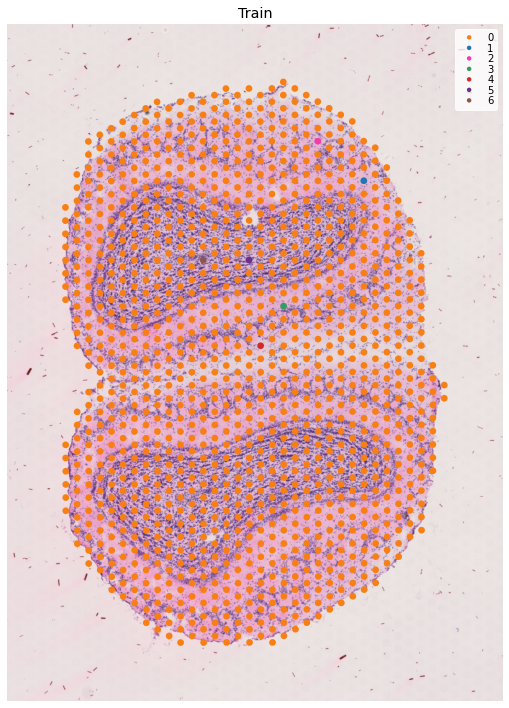

In [ ]:
engine.cluster_reconstructed_data(reconstructed_data)

## NMF- Random spots + smoothing (full mean between spot and neighbors)

In [ ]:
dataset, data = load_visium_data(dataset_name, min_cells=177, min_counts=10, smooth_type='mean')

/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/content/drive/My Drive/Studies 2/Year 2/Final Project/project_git_repo/code/load_data.py:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spot_expression[f'{neighbor_name[0]}_{row_ind}_{col_ind}'] = top_left_spot_data_expressions['expression'].values.astype(float)
/content/drive/My Drive/Studies 2/Year 2/Final Project/project_git_repo/code/load_data.py:138: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [ ]:
params = {
    'learning_rate': 0.1,
    'optimizer': "SGD",
    'latent_dim': 40,
    'batch_size': 128
}

In [ ]:
number_of_spots = data.n_obs
number_of_genes = data.n_vars
nmf_model = NMF(data.n_vars, data.n_obs, params)

In [ ]:
nmf_execute = engine(model = nmf_model,
                    model_name = 'NMF',
                    params = params,
                    epochs = 300,
                    criterion = RMSELossWithoutZeros(),
                    dl_train = dataset.dl_train,
                    dl_valid = dataset.dl_valid,
                    dl_test = dataset.dl_test,
                    device = device)

NMF(
  (embedding_genes): Embedding(9529, 40)
  (embedding_spots): Embedding(1186, 40)
)


In [ ]:
nmf_train_losses, nmf_test_losses = nmf_execute.execute()

Train epoch 0/300: 100%|██████████| 71449/71449 [05:55<00:00, 201.21it/s]


Epoch #0 Train Loss: 0.916174078162151
Epoch #0 Validation Loss: 0.9146911505363087


Train epoch 1/300: 100%|██████████| 71449/71449 [06:03<00:00, 196.39it/s]


Epoch #1 Train Loss: 0.904909515694762
Epoch #1 Validation Loss: 0.86768643485661


Train epoch 2/300: 100%|██████████| 71449/71449 [06:12<00:00, 191.87it/s]


Epoch #2 Train Loss: 0.8072230007752368
Epoch #2 Validation Loss: 0.7581699642539633


Train epoch 3/300: 100%|██████████| 71449/71449 [06:25<00:00, 185.27it/s]


Epoch #3 Train Loss: 0.7367881107340976
Epoch #3 Validation Loss: 0.6964659145804319


Train epoch 4/300: 100%|██████████| 71449/71449 [06:44<00:00, 176.72it/s]


Epoch #4 Train Loss: 0.6903893385303336
Epoch #4 Validation Loss: 0.6554973417706094


Train epoch 5/300: 100%|██████████| 71449/71449 [06:54<00:00, 172.26it/s]


Epoch #5 Train Loss: 0.656040640692433
Epoch #5 Validation Loss: 0.6246162034296981


Train epoch 6/300: 100%|██████████| 71449/71449 [06:59<00:00, 170.37it/s]


Epoch #6 Train Loss: 0.6290389319332361
Epoch #6 Validation Loss: 0.6008637549595038


Train epoch 7/300: 100%|██████████| 71449/71449 [07:09<00:00, 166.20it/s]


Epoch #7 Train Loss: 0.6076591368451644
Epoch #7 Validation Loss: 0.5821867002219461


Train epoch 8/300: 100%|██████████| 71449/71449 [07:23<00:00, 161.24it/s]


Epoch #8 Train Loss: 0.5902824693452077
Epoch #8 Validation Loss: 0.567007644093957


Train epoch 9/300: 100%|██████████| 71449/71449 [07:20<00:00, 162.19it/s]


Epoch #9 Train Loss: 0.5758022810975162
Epoch #9 Validation Loss: 0.5543823150883532


Train epoch 10/300: 100%|██████████| 71449/71449 [07:34<00:00, 157.10it/s]


Epoch #10 Train Loss: 0.5635441084896224
Epoch #10 Validation Loss: 0.5437354368415459


Train epoch 11/300: 100%|██████████| 71449/71449 [07:45<00:00, 153.36it/s]


Epoch #11 Train Loss: 0.5530462695855403
Epoch #11 Validation Loss: 0.5346449657805086


Train epoch 12/300: 100%|██████████| 71449/71449 [08:08<00:00, 146.36it/s]


Epoch #12 Train Loss: 0.5439539809376422
Epoch #12 Validation Loss: 0.5267832970081002
Early stopping


### Plot train and test vs epochs

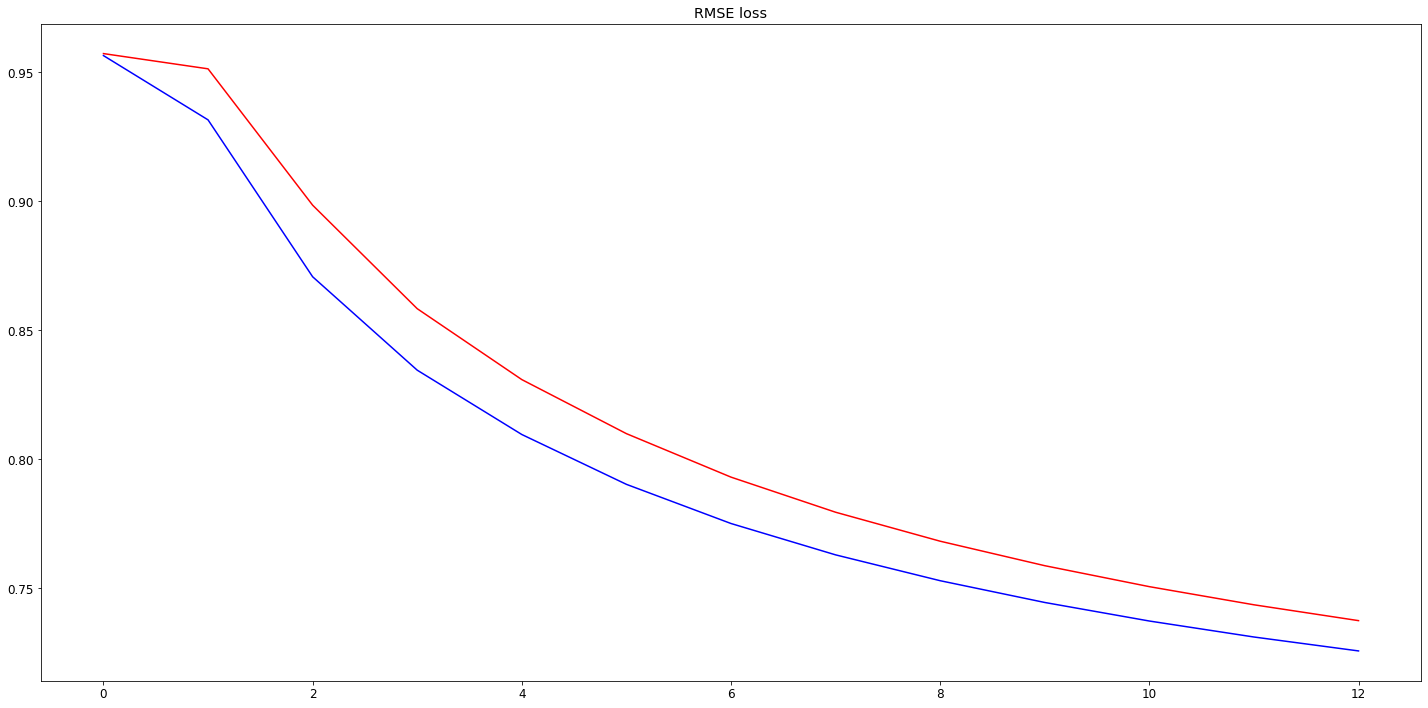

In [ ]:
plot_train_vs_test(nmf_train_losses, nmf_test_losses, "RMSE loss")

### Reconstruct data

In [ ]:
df_expressions_preds, df_expressions_true, reconstructed_data = engine.create_reconstructed_data(nmf_model, dataset, data, device)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


  (0, 3964)	1.0
  (0, 1760)	2.0
  (0, 8731)	1.0
  (0, 2402)	1.0
  (0, 6825)	1.0
  (0, 3744)	1.0
  (0, 3746)	1.0
  (0, 5969)	1.0
  (0, 6350)	1.0
  (0, 1531)	1.0
  (0, 7469)	1.0
  (0, 4043)	1.0
  (0, 7871)	1.0
  (0, 4654)	1.0
  (0, 5184)	1.0
  (0, 3325)	1.0
  (0, 1186)	1.0
  (0, 3164)	1.0
  (0, 3072)	1.0
  (0, 6163)	1.0
  (0, 5250)	1.0
  (0, 4762)	1.0
  (0, 4660)	1.0
  (0, 5647)	1.0
  (0, 5746)	2.0
  :	:
  (1184, 4463)	3.0
  (1184, 7282)	1.0
  (1184, 5687)	11.0
  (1184, 1418)	1.0
  (1184, 6630)	1.0
  (1184, 6555)	2.0
  (1184, 3306)	6.0
  (1184, 6458)	1.0
  (1184, 8425)	24.0
  (1184, 6224)	3.0
  (1184, 3484)	1.0
  (1184, 9521)	196.0
  (1184, 9522)	125.0
  (1184, 9517)	891.0
  (1184, 9518)	499.0
  (1184, 9516)	3.0
  (1184, 9515)	524.0
  (1184, 9519)	682.0
  (1184, 9523)	42.0
  (1184, 9525)	6.0
  (1184, 9524)	260.0
  (1184, 9526)	36.0
  (1184, 9520)	295.0
  (1184, 8952)	1.0
  (1184, 138)	2.0 [[0.11875349 0.07880698 0.08471159 ... 0.49672398 1.14789045 0.01716239]
 [0.50789541 0.26033872 0.2

/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


### Cluster and plot reconstructed data

Normalization step is finished in adata.X
PCA is done! Generated in adata.obsm['X_pca'], adata.uns['pca'] and adata.varm['PCs']
Applying Kmeans clustering ...
Kmeans clustering is done! The labels are stored in adata.obs["kmeans"]


<Figure size 1440x720 with 0 Axes>

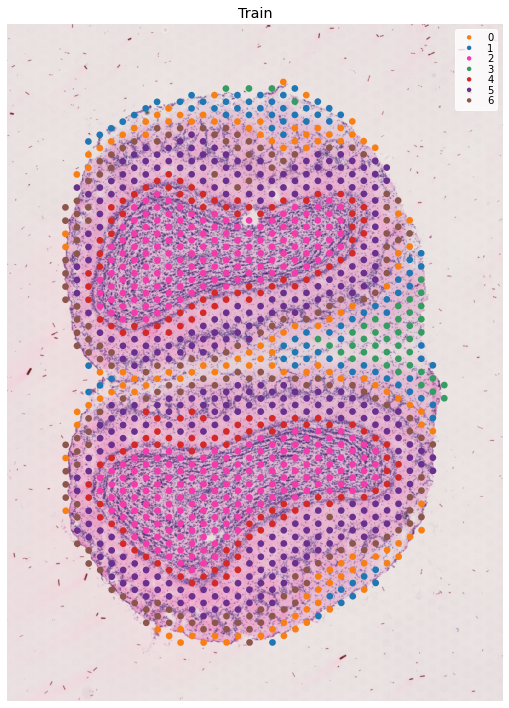

In [ ]:
engine.cluster_reconstructed_data(reconstructed_data)

## NMF- Random spots + smoothing (weighted mean between spot (0.5) and neighbors (0.5))

In [ ]:
dataset, data = load_visium_data(dataset_name, min_cells=177, min_counts=10, smooth_type='mean_wrt_distance')

/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/content/drive/My Drive/Studies 2/Year 2/Final Project/project_git_repo/code/load_data.py:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spot_expression[f'{neighbor_name[0]}_{row_ind}_{col_ind}'] = top_left_spot_data_expressions['expression'].values.astype(float)
/content/drive/My Drive/Studies 2/Year 2/Final Project/project_git_repo/code/load_data.py:142: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [ ]:
params = {
    'learning_rate': 0.1,
    'optimizer': "SGD",
    'latent_dim': 40,
    'batch_size': 128
}

In [ ]:
number_of_spots = data.n_obs
number_of_genes = data.n_vars
nmf_model = NMF(data.n_vars, data.n_obs, params)

In [ ]:
nmf_execute = engine(model = nmf_model,
                    model_name = 'NMF',
                    params = params,
                    epochs = 300,
                    criterion = RMSELossWithoutZeros(),
                    dl_train = dataset.dl_train,
                    dl_valid = dataset.dl_valid,
                    dl_test = dataset.dl_test,
                    device = device)

NMF(
  (embedding_genes): Embedding(9529, 40)
  (embedding_spots): Embedding(1186, 40)
)


In [ ]:
nmf_train_losses, nmf_test_losses = nmf_execute.execute()

Train epoch 0/300: 100%|██████████| 71449/71449 [06:02<00:00, 197.36it/s]


Epoch #0 Train Loss: 0.9276121710674523
Epoch #0 Validation Loss: 0.9262786523122504


Train epoch 1/300: 100%|██████████| 71449/71449 [06:08<00:00, 193.65it/s]


Epoch #1 Train Loss: 0.9170519359180942
Epoch #1 Validation Loss: 0.8833201933091475


Train epoch 2/300: 100%|██████████| 71449/71449 [06:26<00:00, 185.01it/s]


Epoch #2 Train Loss: 0.827628464807773
Epoch #2 Validation Loss: 0.7816948497656325


Train epoch 3/300: 100%|██████████| 71449/71449 [06:37<00:00, 179.94it/s]


Epoch #3 Train Loss: 0.76252172361673
Epoch #3 Validation Loss: 0.7252480476756757


Train epoch 4/300: 100%|██████████| 71449/71449 [06:41<00:00, 177.94it/s]


Epoch #4 Train Loss: 0.7202589929748374
Epoch #4 Validation Loss: 0.6886307113555299


Train epoch 5/300: 100%|██████████| 71449/71449 [06:48<00:00, 175.07it/s]


Epoch #5 Train Loss: 0.6898834169523813
Epoch #5 Validation Loss: 0.6619495957647376


Train epoch 6/300: 100%|██████████| 71449/71449 [06:52<00:00, 173.03it/s]


Epoch #6 Train Loss: 0.6662186558168403
Epoch #6 Validation Loss: 0.6411471684174492


Train epoch 7/300: 100%|██████████| 71449/71449 [07:09<00:00, 166.31it/s]


Epoch #7 Train Loss: 0.6473133953174453
Epoch #7 Validation Loss: 0.6247790958778047


Train epoch 8/300: 100%|██████████| 71449/71449 [07:28<00:00, 159.33it/s]


Epoch #8 Train Loss: 0.6320366676632061
Epoch #8 Validation Loss: 0.6116060722069575


Train epoch 9/300: 100%|██████████| 71449/71449 [07:35<00:00, 156.76it/s]


Epoch #9 Train Loss: 0.6194069690018358
Epoch #9 Validation Loss: 0.6007182588647973


Train epoch 10/300: 100%|██████████| 71449/71449 [07:47<00:00, 152.86it/s]


Epoch #10 Train Loss: 0.6087416647587776
Epoch #10 Validation Loss: 0.5915311259755665


Train epoch 11/300: 100%|██████████| 71449/71449 [08:12<00:00, 145.03it/s]


Epoch #11 Train Loss: 0.5996000374442001
Epoch #11 Validation Loss: 0.5836792628804951
Early stopping


### Plot train and test vs epochs

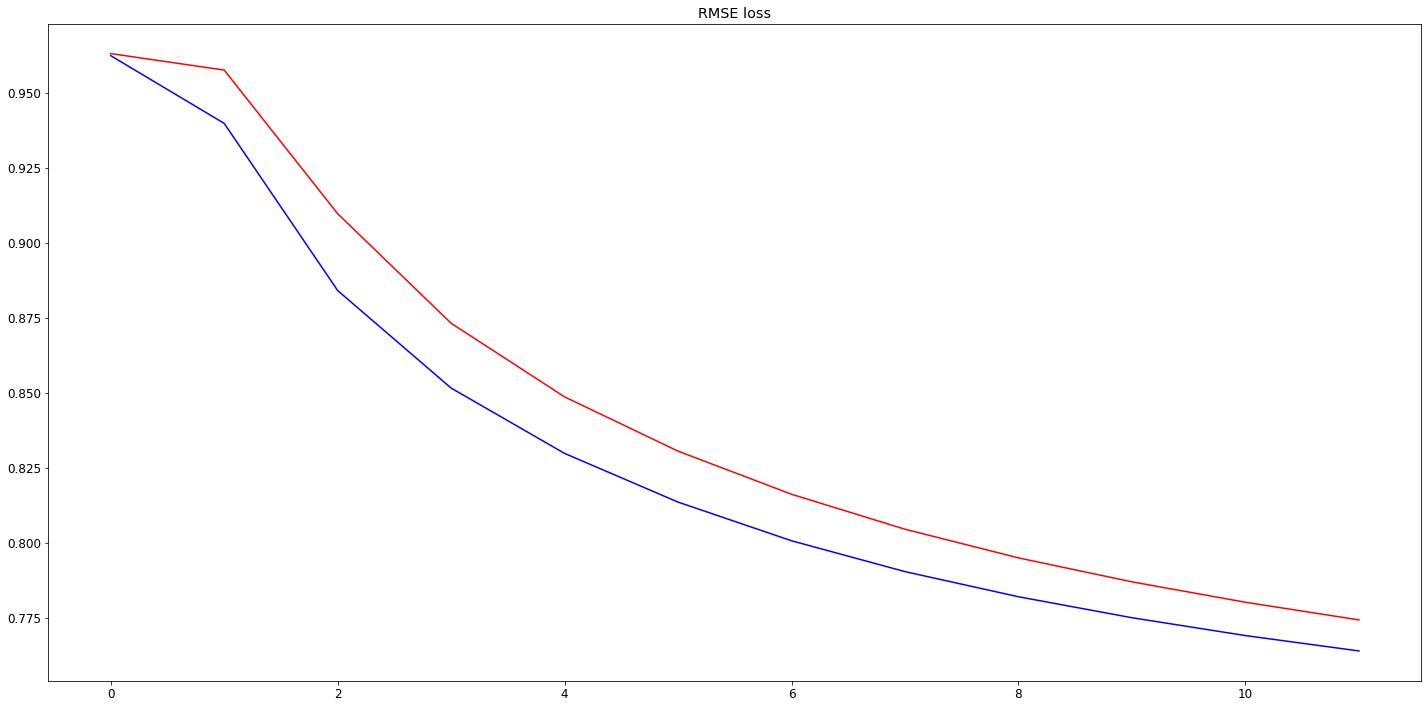

In [ ]:
plot_train_vs_test(nmf_train_losses, nmf_test_losses, "RMSE loss")

### Reconstruct data

In [ ]:
df_expressions_preds, df_expressions_true, reconstructed_data = engine.create_reconstructed_data(nmf_model, dataset, data, device)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


  (0, 3964)	1.0
  (0, 1760)	2.0
  (0, 8731)	1.0
  (0, 2402)	1.0
  (0, 6825)	1.0
  (0, 3744)	1.0
  (0, 3746)	1.0
  (0, 5969)	1.0
  (0, 6350)	1.0
  (0, 1531)	1.0
  (0, 7469)	1.0
  (0, 4043)	1.0
  (0, 7871)	1.0
  (0, 4654)	1.0
  (0, 5184)	1.0
  (0, 3325)	1.0
  (0, 1186)	1.0
  (0, 3164)	1.0
  (0, 3072)	1.0
  (0, 6163)	1.0
  (0, 5250)	1.0
  (0, 4762)	1.0
  (0, 4660)	1.0
  (0, 5647)	1.0
  (0, 5746)	2.0
  :	:
  (1184, 4463)	3.0
  (1184, 7282)	1.0
  (1184, 5687)	11.0
  (1184, 1418)	1.0
  (1184, 6630)	1.0
  (1184, 6555)	2.0
  (1184, 3306)	6.0
  (1184, 6458)	1.0
  (1184, 8425)	24.0
  (1184, 6224)	3.0
  (1184, 3484)	1.0
  (1184, 9521)	196.0
  (1184, 9522)	125.0
  (1184, 9517)	891.0
  (1184, 9518)	499.0
  (1184, 9516)	3.0
  (1184, 9515)	524.0
  (1184, 9519)	682.0
  (1184, 9523)	42.0
  (1184, 9525)	6.0
  (1184, 9524)	260.0
  (1184, 9526)	36.0
  (1184, 9520)	295.0
  (1184, 8952)	1.0
  (1184, 138)	2.0 [[0.0857961  0.05193975 0.07887684 ... 0.539235   1.18973327 0.07339256]
 [0.49013156 0.27034584 0.2

/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


### Cluster and plot reconstructed data

Normalization step is finished in adata.X
PCA is done! Generated in adata.obsm['X_pca'], adata.uns['pca'] and adata.varm['PCs']
Applying Kmeans clustering ...
Kmeans clustering is done! The labels are stored in adata.obs["kmeans"]


<Figure size 1440x720 with 0 Axes>

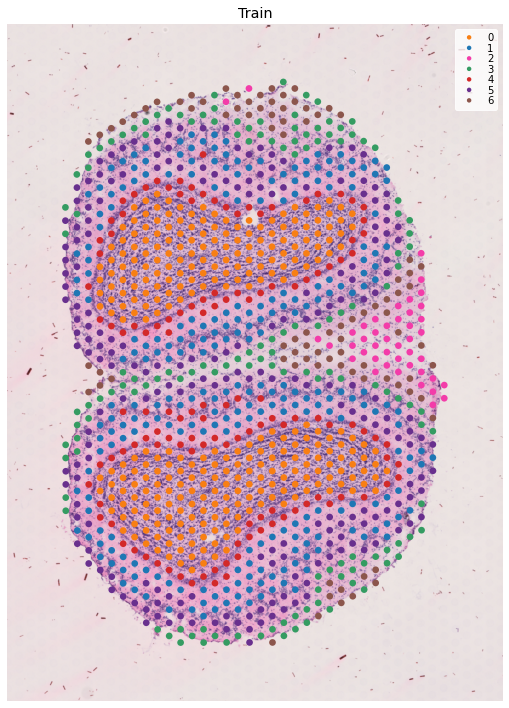

In [ ]:
engine.cluster_reconstructed_data(reconstructed_data)

## NMF- Random spots + smoothing of 2 spots away 

In [4]:
dataset, data = load_visium_data(dataset_name, min_cells=177, min_counts=10, smooth_type='mean_wrt_distance_x2')

/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/content/drive/MyDrive/Studies 2/Year 2/Final Project/project_git_repo/code/load_data.py:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spot_expression[f'{neighbor_name[0]}_{row_ind}_{col_ind}'] = top_left_spot_data_expressions['expression'].values.astype(float)
/content/drive/MyDrive/Studies 2/Year 2/Final Project/project_git_repo/code/load_data.py:138: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

In [5]:
params = {
    'learning_rate': 0.1,
    'optimizer': "SGD",
    'latent_dim': 40,
    'batch_size': 128
}

In [6]:
number_of_spots = data.n_obs
number_of_genes = data.n_vars
nmf_model = NMF(data.n_vars, data.n_obs, params)

In [7]:
nmf_execute = engine(model = nmf_model,
                    model_name = 'NMF',
                    params = params,
                    epochs = 300,
                    dl_train = dataset.dl_train,
                    dl_valid = dataset.dl_valid,
                    dl_test = dataset.dl_test,
                    device = device)

NMF(
  (embedding_genes): Embedding(9529, 40)
  (embedding_spots): Embedding(1186, 40)
)


In [8]:
nmf_train_losses, nmf_test_losses = nmf_execute.execute()

Train epoch 0/300: 100%|██████████| 71449/71449 [04:44<00:00, 251.47it/s]


Epoch #0 Train Loss: 0.7869459930100593
Epoch #0 Validation Loss: 0.7532111459424196


Train epoch 1/300: 100%|██████████| 71449/71449 [04:35<00:00, 259.74it/s]


Epoch #1 Train Loss: 0.6457618928871346
Epoch #1 Validation Loss: 0.5456419223759553


Train epoch 2/300: 100%|██████████| 71449/71449 [04:40<00:00, 254.74it/s]


Epoch #2 Train Loss: 0.5356443227111386
Epoch #2 Validation Loss: 0.4553363960506013


Train epoch 3/300: 100%|██████████| 71449/71449 [04:43<00:00, 252.12it/s]


Epoch #3 Train Loss: 0.470861547556576
Epoch #3 Validation Loss: 0.40252438007262814


Train epoch 4/300: 100%|██████████| 71449/71449 [04:52<00:00, 244.38it/s]


Epoch #4 Train Loss: 0.4271984361643421
Epoch #4 Validation Loss: 0.36709504222678835


Train epoch 5/300: 100%|██████████| 71449/71449 [04:56<00:00, 240.89it/s]


Epoch #5 Train Loss: 0.39532027103443673
Epoch #5 Validation Loss: 0.34131347576604865


Train epoch 6/300: 100%|██████████| 71449/71449 [04:59<00:00, 238.55it/s]


Epoch #6 Train Loss: 0.37075749749255865
Epoch #6 Validation Loss: 0.32147265811896725


Train epoch 7/300: 100%|██████████| 71449/71449 [05:09<00:00, 231.22it/s]


Epoch #7 Train Loss: 0.35104326127217883
Epoch #7 Validation Loss: 0.3055143204525346


Train epoch 8/300: 100%|██████████| 71449/71449 [05:12<00:00, 228.87it/s]


Epoch #8 Train Loss: 0.33467018169270957
Epoch #8 Validation Loss: 0.29217229639303127


Train epoch 9/300: 100%|██████████| 71449/71449 [05:18<00:00, 224.41it/s]


Epoch #9 Train Loss: 0.32066541427154255
Epoch #9 Validation Loss: 0.2806621546900957


Train epoch 10/300: 100%|██████████| 71449/71449 [05:24<00:00, 220.21it/s]


Epoch #10 Train Loss: 0.3084248152842847
Epoch #10 Validation Loss: 0.2705490732950235


Train epoch 11/300: 100%|██████████| 71449/71449 [05:29<00:00, 216.77it/s]


Epoch #11 Train Loss: 0.2976079187016978
Epoch #11 Validation Loss: 0.2616111167837541


Train epoch 12/300: 100%|██████████| 71449/71449 [05:45<00:00, 206.76it/s]


Epoch #12 Train Loss: 0.2880066687245709
Epoch #12 Validation Loss: 0.25369566128082194
Early stopping


### Plot train and test vs epochs

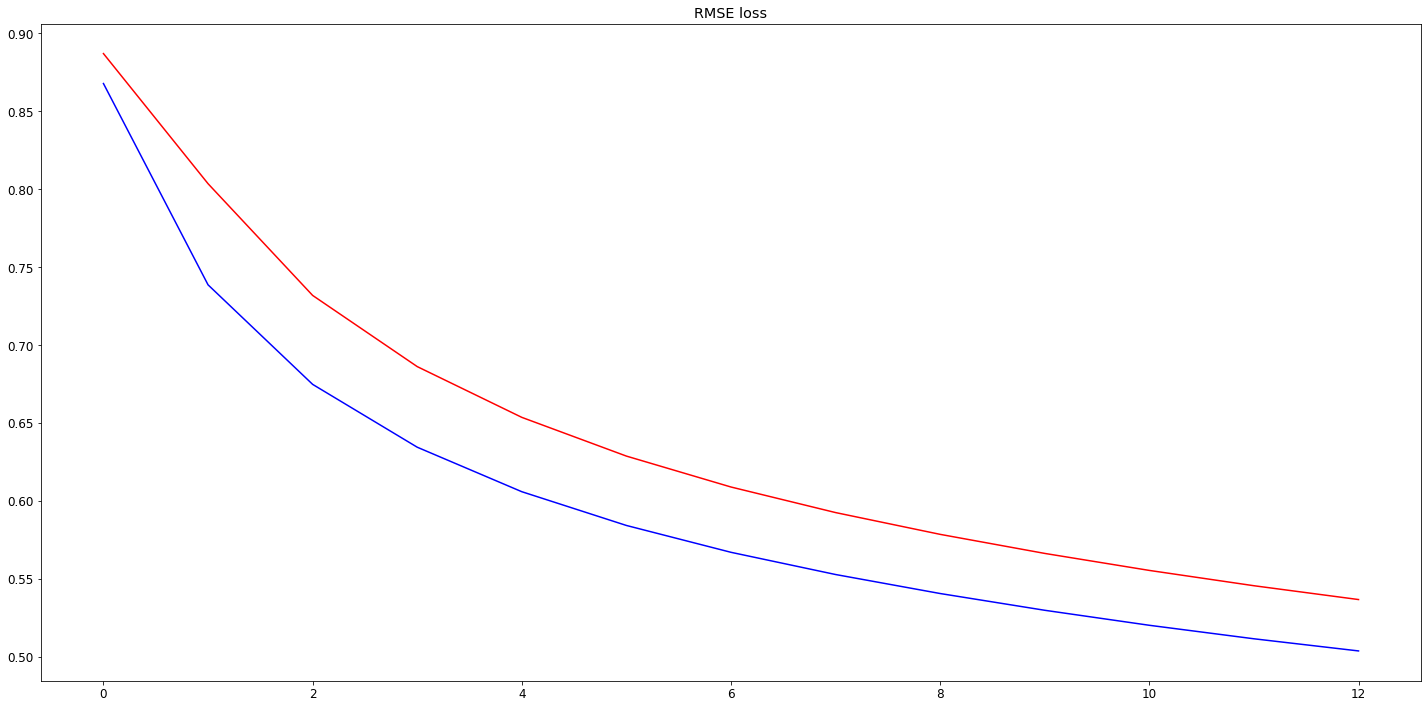

In [9]:
plot_train_vs_test(nmf_train_losses, nmf_test_losses, "RMSE loss")

### Reconstruct data

In [10]:
df_expressions_preds, df_expressions_true, reconstructed_data = engine.create_reconstructed_data(nmf_model, dataset, data, device)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


  (0, 3964)	1.0
  (0, 1760)	2.0
  (0, 8731)	1.0
  (0, 2402)	1.0
  (0, 6825)	1.0
  (0, 3744)	1.0
  (0, 3746)	1.0
  (0, 5969)	1.0
  (0, 6350)	1.0
  (0, 1531)	1.0
  (0, 7469)	1.0
  (0, 4043)	1.0
  (0, 7871)	1.0
  (0, 4654)	1.0
  (0, 5184)	1.0
  (0, 3325)	1.0
  (0, 1186)	1.0
  (0, 3164)	1.0
  (0, 3072)	1.0
  (0, 6163)	1.0
  (0, 5250)	1.0
  (0, 4762)	1.0
  (0, 4660)	1.0
  (0, 5647)	1.0
  (0, 5746)	2.0
  :	:
  (1184, 4463)	3.0
  (1184, 7282)	1.0
  (1184, 5687)	11.0
  (1184, 1418)	1.0
  (1184, 6630)	1.0
  (1184, 6555)	2.0
  (1184, 3306)	6.0
  (1184, 6458)	1.0
  (1184, 8425)	24.0
  (1184, 6224)	3.0
  (1184, 3484)	1.0
  (1184, 9521)	196.0
  (1184, 9522)	125.0
  (1184, 9517)	891.0
  (1184, 9518)	499.0
  (1184, 9516)	3.0
  (1184, 9515)	524.0
  (1184, 9519)	682.0
  (1184, 9523)	42.0
  (1184, 9525)	6.0
  (1184, 9524)	260.0
  (1184, 9526)	36.0
  (1184, 9520)	295.0
  (1184, 8952)	1.0
  (1184, 138)	2.0 [[0.11077562 0.03007735 0.09964399 ... 0.59192502 1.19300032 0.06353507]
 [0.39821279 0.34345359 0.2

/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


### Cluster and plot reconstructed data

Normalization step is finished in adata.X
PCA is done! Generated in adata.obsm['X_pca'], adata.uns['pca'] and adata.varm['PCs']
Applying Kmeans clustering ...
Kmeans clustering is done! The labels are stored in adata.obs["kmeans"]


<Figure size 1440x720 with 0 Axes>

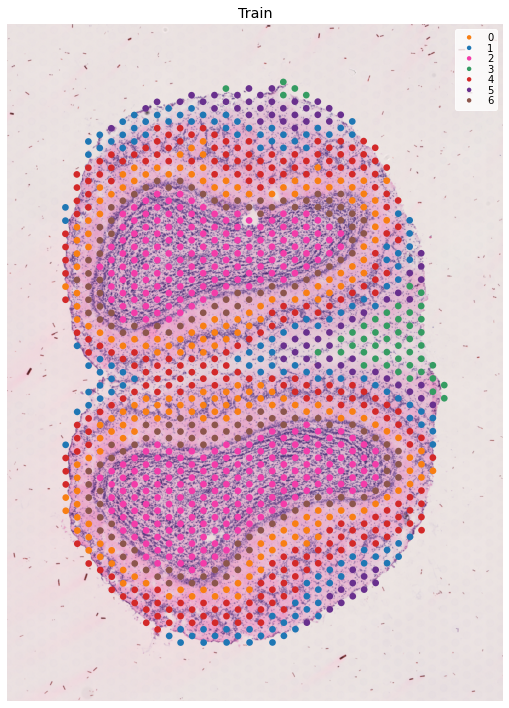

In [11]:
engine.cluster_reconstructed_data(reconstructed_data)

## NMF- Random spots + smoothing of 2 spots away + only same side of edge

In [12]:
dataset, data = load_visium_data(dataset_name, min_cells=177, min_counts=10, smooth_type='mean_wrt_edge')

/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/content/drive/MyDrive/Studies 2/Year 2/Final Project/project_git_repo/code/load_data.py:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spot_expression[f'{neighbor_name[0]}_{row_ind}_{col_ind}'] = top_left_spot_data_expressions['expression'].values.astype(float)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

In [13]:
params = {
    'learning_rate': 0.1,
    'optimizer': "SGD",
    'latent_dim': 40,
    'batch_size': 128
}

In [14]:
number_of_spots = data.n_obs
number_of_genes = data.n_vars
nmf_model = NMF(data.n_vars, data.n_obs, params)

In [15]:
nmf_execute = engine(model = nmf_model,
                    model_name = 'NMF',
                    params = params,
                    epochs = 300,
                    criterion = RMSELossWithoutZeros(),
                    dl_train = dataset.dl_train,
                    dl_valid = dataset.dl_valid,
                    dl_test = dataset.dl_test,
                    device = device)

NMF(
  (embedding_genes): Embedding(9529, 40)
  (embedding_spots): Embedding(1186, 40)
)


In [16]:
nmf_train_losses, nmf_test_losses = nmf_execute.execute()

Train epoch 0/300: 100%|██████████| 71449/71449 [05:25<00:00, 219.37it/s]


Epoch #0 Train Loss: 0.9458556983417783
Epoch #0 Validation Loss: 0.9437524069685712


Train epoch 1/300: 100%|██████████| 71449/71449 [05:26<00:00, 218.89it/s]


Epoch #1 Train Loss: 0.9285676349060855
Epoch #1 Validation Loss: 0.869465964322196


Train epoch 2/300: 100%|██████████| 71449/71449 [05:29<00:00, 216.60it/s]


Epoch #2 Train Loss: 0.8232516235495811
Epoch #2 Validation Loss: 0.7674230395495422


Train epoch 3/300: 100%|██████████| 71449/71449 [05:30<00:00, 216.32it/s]


Epoch #3 Train Loss: 0.7559347353344215
Epoch #3 Validation Loss: 0.7105867305851871


Train epoch 4/300: 100%|██████████| 71449/71449 [05:32<00:00, 214.61it/s]


Epoch #4 Train Loss: 0.7120963282288968
Epoch #4 Validation Loss: 0.6736181576458298


Train epoch 5/300: 100%|██████████| 71449/71449 [05:25<00:00, 219.38it/s]


Epoch #5 Train Loss: 0.6804747719736145
Epoch #5 Validation Loss: 0.6465457601800481


Train epoch 6/300: 100%|██████████| 71449/71449 [05:17<00:00, 225.02it/s]


Epoch #6 Train Loss: 0.6557887863588623
Epoch #6 Validation Loss: 0.6254466070221563


Train epoch 7/300: 100%|██████████| 71449/71449 [05:21<00:00, 222.40it/s]


Epoch #7 Train Loss: 0.6360767513334874
Epoch #7 Validation Loss: 0.608811170096185


Train epoch 8/300: 100%|██████████| 71449/71449 [05:27<00:00, 218.00it/s]


Epoch #8 Train Loss: 0.6200784225827816
Epoch #8 Validation Loss: 0.5953340772404959


Train epoch 9/300: 100%|██████████| 71449/71449 [05:35<00:00, 213.11it/s]


Epoch #9 Train Loss: 0.6067620431889478
Epoch #9 Validation Loss: 0.5841086951391893


Train epoch 10/300: 100%|██████████| 71449/71449 [05:43<00:00, 207.80it/s]


Epoch #10 Train Loss: 0.5954359784241241
Epoch #10 Validation Loss: 0.5745642635921194


Train epoch 11/300: 100%|██████████| 71449/71449 [05:55<00:00, 201.13it/s]


Epoch #11 Train Loss: 0.5856501730623279
Epoch #11 Validation Loss: 0.5663247290278093
Early stopping


### Plot train and test vs epochs

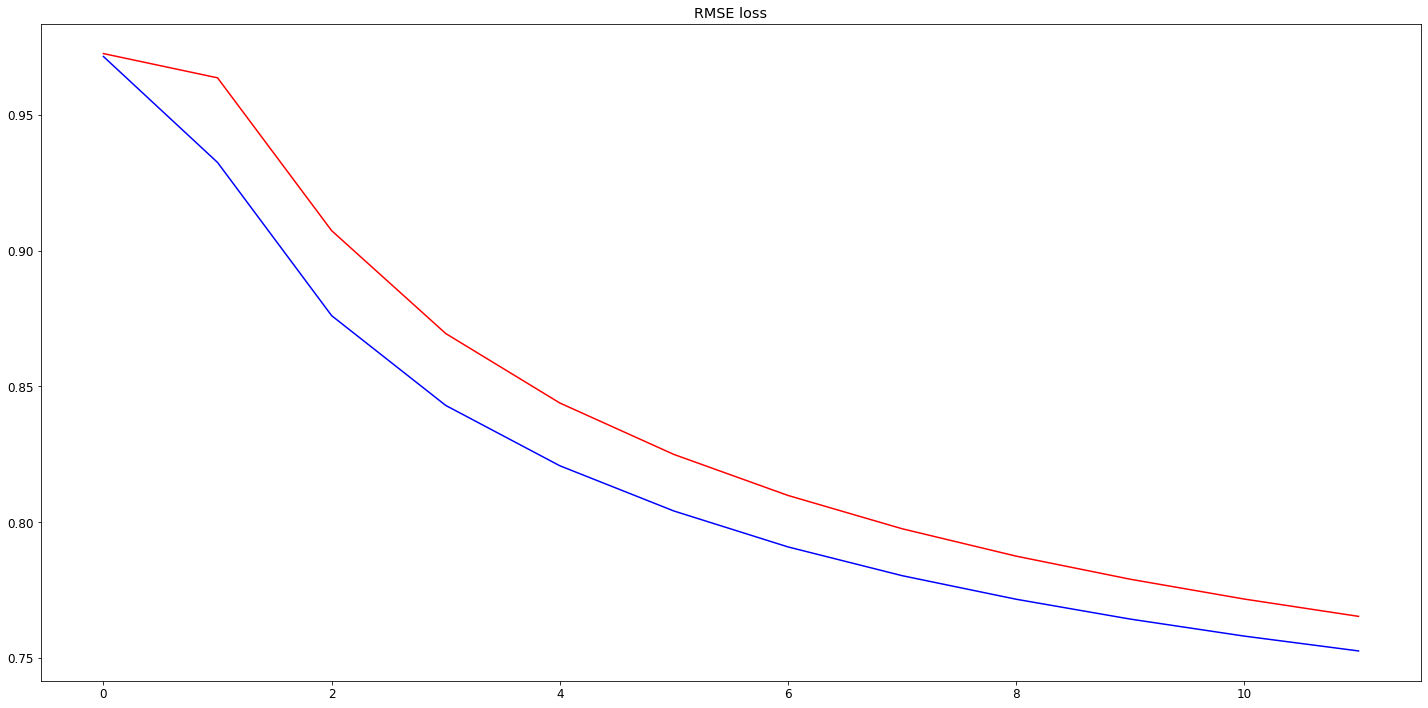

In [17]:
plot_train_vs_test(nmf_train_losses, nmf_test_losses, "RMSE loss")

### Reconstruct data

In [18]:
df_expressions_preds, df_expressions_true, reconstructed_data = engine.create_reconstructed_data(nmf_model, dataset, data, device)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


  (0, 3964)	1.0
  (0, 1760)	2.0
  (0, 8731)	1.0
  (0, 2402)	1.0
  (0, 6825)	1.0
  (0, 3744)	1.0
  (0, 3746)	1.0
  (0, 5969)	1.0
  (0, 6350)	1.0
  (0, 1531)	1.0
  (0, 7469)	1.0
  (0, 4043)	1.0
  (0, 7871)	1.0
  (0, 4654)	1.0
  (0, 5184)	1.0
  (0, 3325)	1.0
  (0, 1186)	1.0
  (0, 3164)	1.0
  (0, 3072)	1.0
  (0, 6163)	1.0
  (0, 5250)	1.0
  (0, 4762)	1.0
  (0, 4660)	1.0
  (0, 5647)	1.0
  (0, 5746)	2.0
  :	:
  (1184, 4463)	3.0
  (1184, 7282)	1.0
  (1184, 5687)	11.0
  (1184, 1418)	1.0
  (1184, 6630)	1.0
  (1184, 6555)	2.0
  (1184, 3306)	6.0
  (1184, 6458)	1.0
  (1184, 8425)	24.0
  (1184, 6224)	3.0
  (1184, 3484)	1.0
  (1184, 9521)	196.0
  (1184, 9522)	125.0
  (1184, 9517)	891.0
  (1184, 9518)	499.0
  (1184, 9516)	3.0
  (1184, 9515)	524.0
  (1184, 9519)	682.0
  (1184, 9523)	42.0
  (1184, 9525)	6.0
  (1184, 9524)	260.0
  (1184, 9526)	36.0
  (1184, 9520)	295.0
  (1184, 8952)	1.0
  (1184, 138)	2.0 [[0.08186401 0.06153772 0.09363053 ... 0.55334222 1.20370317 0.11344069]
 [0.44597274 0.3067624  0.2

/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


### Cluster and plot reconstructed data

Normalization step is finished in adata.X
PCA is done! Generated in adata.obsm['X_pca'], adata.uns['pca'] and adata.varm['PCs']
Applying Kmeans clustering ...
Kmeans clustering is done! The labels are stored in adata.obs["kmeans"]


<Figure size 1440x720 with 0 Axes>

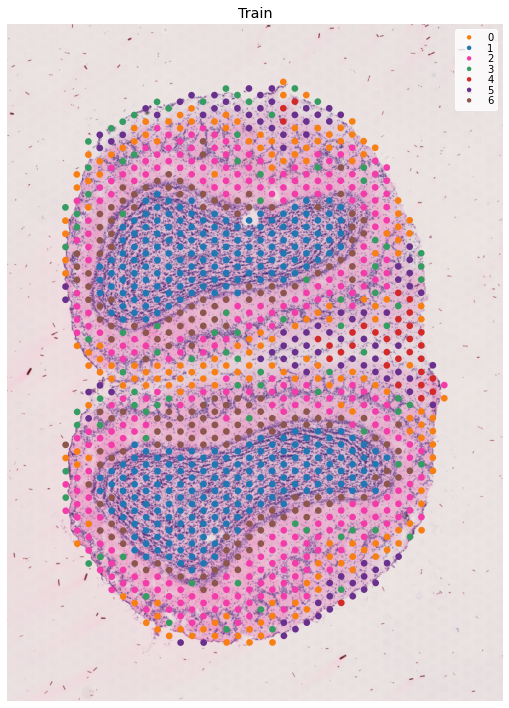

In [19]:
engine.cluster_reconstructed_data(reconstructed_data)

## NMF- Random spots + smoothing of 2 spots away + only pixels mean differs up to 10 + tile of size 10

In [20]:
dataset, data = load_visium_data(dataset_name, min_cells=177, min_counts=10, smooth_type='mean_wrt_to_neighbors_tiles_means')

/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/content/drive/MyDrive/Studies 2/Year 2/Final Project/project_git_repo/code/load_data.py:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spot_expression[f'{neighbor_name[0]}_{row_ind}_{col_ind}'] = top_left_spot_data_expressions['expression'].values.astype(float)
/content/drive/MyDrive/Studies 2/Year 2/Final Project/project_git_repo/code/load_data.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

In [21]:
params = {
    'learning_rate': 0.1,
    'optimizer': "SGD",
    'latent_dim': 40,
    'batch_size': 128
}

In [22]:
number_of_spots = data.n_obs
number_of_genes = data.n_vars
nmf_model = NMF(data.n_vars, data.n_obs, params)

In [23]:
nmf_execute = engine(model = nmf_model,
                    model_name = 'NMF',
                    params = params,
                    epochs = 300,
                    criterion = RMSELossWithoutZeros(),
                    dl_train = dataset.dl_train,
                    dl_valid = dataset.dl_valid,
                    dl_test = dataset.dl_test,
                    device = device)

NMF(
  (embedding_genes): Embedding(9529, 40)
  (embedding_spots): Embedding(1186, 40)
)


In [24]:
nmf_train_losses, nmf_test_losses = nmf_execute.execute()

Train epoch 0/300: 100%|██████████| 71449/71449 [04:56<00:00, 240.73it/s]


Epoch #0 Train Loss: 0.8924013340703595
Epoch #0 Validation Loss: 0.8907913234173273


Train epoch 1/300: 100%|██████████| 71449/71449 [04:58<00:00, 239.03it/s]


Epoch #1 Train Loss: 0.8805728758614078
Epoch #1 Validation Loss: 0.8420063109508361


Train epoch 2/300: 100%|██████████| 71449/71449 [05:16<00:00, 225.97it/s]


Epoch #2 Train Loss: 0.7786806401410978
Epoch #2 Validation Loss: 0.7274967594053041


Train epoch 3/300: 100%|██████████| 71449/71449 [05:16<00:00, 226.08it/s]


Epoch #3 Train Loss: 0.7045723513894395
Epoch #3 Validation Loss: 0.6619265970642066


Train epoch 4/300: 100%|██████████| 71449/71449 [05:20<00:00, 222.89it/s]


Epoch #4 Train Loss: 0.6545489824964646
Epoch #4 Validation Loss: 0.6162862852107664


Train epoch 5/300: 100%|██████████| 71449/71449 [05:32<00:00, 214.88it/s]


Epoch #5 Train Loss: 0.6160019254114824
Epoch #5 Validation Loss: 0.5814144169422747


Train epoch 6/300: 100%|██████████| 71449/71449 [05:31<00:00, 215.47it/s]


Epoch #6 Train Loss: 0.5860163835356037
Epoch #6 Validation Loss: 0.5548636669034133


Train epoch 7/300: 100%|██████████| 71449/71449 [05:39<00:00, 210.54it/s]


Epoch #7 Train Loss: 0.5622414651440699
Epoch #7 Validation Loss: 0.5338018770909992


Train epoch 8/300: 100%|██████████| 71449/71449 [05:49<00:00, 204.48it/s]


Epoch #8 Train Loss: 0.542747823808146
Epoch #8 Validation Loss: 0.5165233243170954


Train epoch 9/300: 100%|██████████| 71449/71449 [05:58<00:00, 199.39it/s]


Epoch #9 Train Loss: 0.5264056406090263
Epoch #9 Validation Loss: 0.5020944449797015


Train epoch 10/300: 100%|██████████| 71449/71449 [06:03<00:00, 196.62it/s]


Epoch #10 Train Loss: 0.5125356548405277
Epoch #10 Validation Loss: 0.4898965723824836


Train epoch 11/300: 100%|██████████| 71449/71449 [06:10<00:00, 192.62it/s]


Epoch #11 Train Loss: 0.5006245357348063
Epoch #11 Validation Loss: 0.4794430097631177


Train epoch 12/300: 100%|██████████| 71449/71449 [06:13<00:00, 191.49it/s]


Epoch #12 Train Loss: 0.49027052522001785
Epoch #12 Validation Loss: 0.47036526376678406


Train epoch 13/300: 100%|██████████| 71449/71449 [06:22<00:00, 186.96it/s]


Epoch #13 Train Loss: 0.48117075235400264
Epoch #13 Validation Loss: 0.4623959277101675
Early stopping


### Plot train and test vs epochs

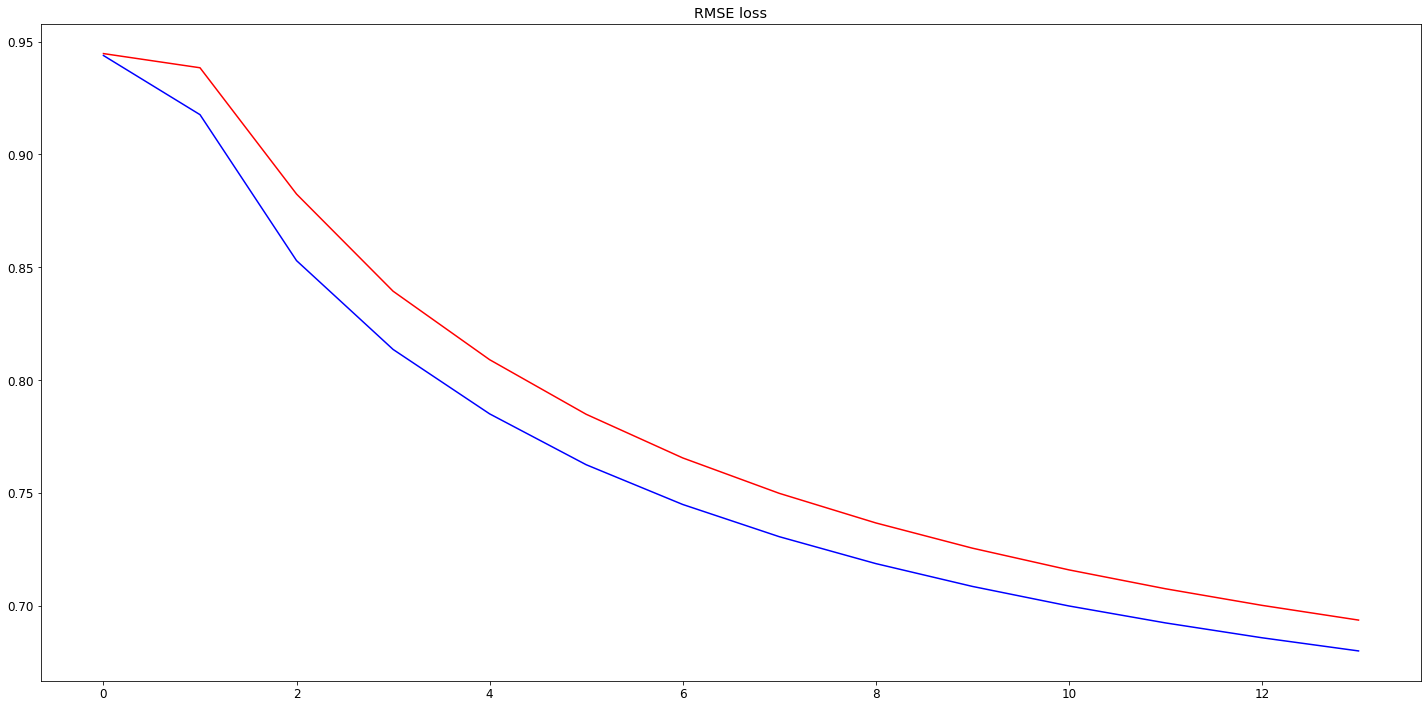

In [25]:
plot_train_vs_test(nmf_train_losses, nmf_test_losses, "RMSE loss")

### Reconstruct data

In [26]:
df_expressions_preds, df_expressions_true, reconstructed_data = engine.create_reconstructed_data(nmf_model, dataset, data, device)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


  (0, 3964)	1.0
  (0, 1760)	2.0
  (0, 8731)	1.0
  (0, 2402)	1.0
  (0, 6825)	1.0
  (0, 3744)	1.0
  (0, 3746)	1.0
  (0, 5969)	1.0
  (0, 6350)	1.0
  (0, 1531)	1.0
  (0, 7469)	1.0
  (0, 4043)	1.0
  (0, 7871)	1.0
  (0, 4654)	1.0
  (0, 5184)	1.0
  (0, 3325)	1.0
  (0, 1186)	1.0
  (0, 3164)	1.0
  (0, 3072)	1.0
  (0, 6163)	1.0
  (0, 5250)	1.0
  (0, 4762)	1.0
  (0, 4660)	1.0
  (0, 5647)	1.0
  (0, 5746)	2.0
  :	:
  (1184, 4463)	3.0
  (1184, 7282)	1.0
  (1184, 5687)	11.0
  (1184, 1418)	1.0
  (1184, 6630)	1.0
  (1184, 6555)	2.0
  (1184, 3306)	6.0
  (1184, 6458)	1.0
  (1184, 8425)	24.0
  (1184, 6224)	3.0
  (1184, 3484)	1.0
  (1184, 9521)	196.0
  (1184, 9522)	125.0
  (1184, 9517)	891.0
  (1184, 9518)	499.0
  (1184, 9516)	3.0
  (1184, 9515)	524.0
  (1184, 9519)	682.0
  (1184, 9523)	42.0
  (1184, 9525)	6.0
  (1184, 9524)	260.0
  (1184, 9526)	36.0
  (1184, 9520)	295.0
  (1184, 8952)	1.0
  (1184, 138)	2.0 [[0.0607246  0.08077417 0.01915042 ... 0.57164919 1.35072017 0.0130835 ]
 [0.38537848 0.32280105 0.2

/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


### Cluster and plot reconstructed data

Normalization step is finished in adata.X
PCA is done! Generated in adata.obsm['X_pca'], adata.uns['pca'] and adata.varm['PCs']
Applying Kmeans clustering ...
Kmeans clustering is done! The labels are stored in adata.obs["kmeans"]


<Figure size 1440x720 with 0 Axes>

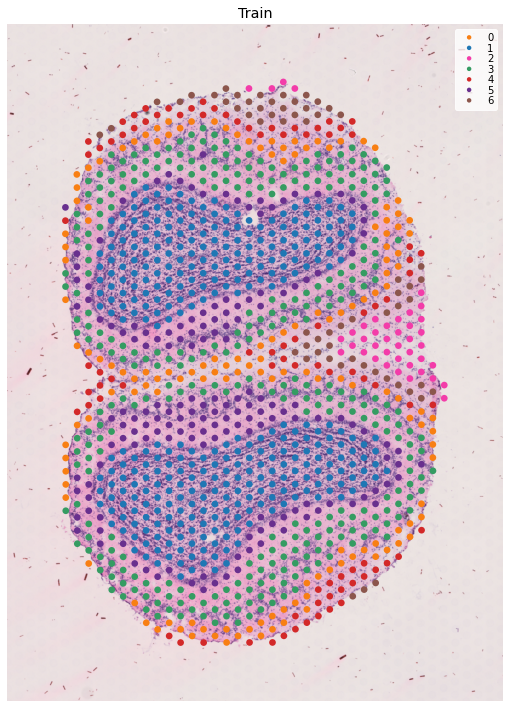

In [27]:
engine.cluster_reconstructed_data(reconstructed_data)

## NMF- Random spots + smoothing of 2 spots away + only pixels mean differs up to 25 + tile of size 10

In [ ]:
dataset, data = load_visium_data(dataset_name, min_cells=177, min_counts=10, smooth_type='mean_wrt_to_neighbors_tiles_means')

In [28]:
params = {
    'learning_rate': 0.1,
    'optimizer': "SGD",
    'latent_dim': 40,
    'batch_size': 128
}

In [29]:
number_of_spots = data.n_obs
number_of_genes = data.n_vars
nmf_model = NMF(data.n_vars, data.n_obs, params)

In [30]:
nmf_execute = engine(model = nmf_model,
                    model_name = 'NMF',
                    params = params,
                    epochs = 300,
                    criterion = RMSELossWithoutZeros(),
                    dl_train = dataset.dl_train,
                    dl_valid = dataset.dl_valid,
                    dl_test = dataset.dl_test,
                    device = device)

NMF(
  (embedding_genes): Embedding(9529, 40)
  (embedding_spots): Embedding(1186, 40)
)


In [31]:
nmf_train_losses, nmf_test_losses = nmf_execute.execute()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Train epoch 0/300: 100%|██████████| 71449/71449 [04:54<00:00, 242.90it/s]


Epoch #0 Train Loss: 0.892449182602629
Epoch #0 Validation Loss: 0.8908315398812217


Train epoch 1/300: 100%|██████████| 71449/71449 [05:04<00:00, 234.77it/s]


Epoch #1 Train Loss: 0.8806713526239844
Epoch #1 Validation Loss: 0.8424006746911039


Train epoch 2/300: 100%|██████████| 71449/71449 [05:11<00:00, 229.39it/s]


Epoch #2 Train Loss: 0.778887788829047
Epoch #2 Validation Loss: 0.7277655771042933


Train epoch 3/300: 100%|██████████| 71449/71449 [05:17<00:00, 224.90it/s]


Epoch #3 Train Loss: 0.7046449204243428
Epoch #3 Validation Loss: 0.6618728352714022


Train epoch 4/300: 100%|██████████| 71449/71449 [05:25<00:00, 219.57it/s]


Epoch #4 Train Loss: 0.6540967009457898
Epoch #4 Validation Loss: 0.6154232478392583


Train epoch 5/300: 100%|██████████| 71449/71449 [05:28<00:00, 217.51it/s]


Epoch #5 Train Loss: 0.615253943078982
Epoch #5 Validation Loss: 0.5805753686011853


Train epoch 6/300: 100%|██████████| 71449/71449 [05:38<00:00, 211.01it/s]


Epoch #6 Train Loss: 0.585322820874161
Epoch #6 Validation Loss: 0.5541049128381147


Train epoch 7/300: 100%|██████████| 71449/71449 [05:44<00:00, 207.10it/s]


Epoch #7 Train Loss: 0.5616099935145105
Epoch #7 Validation Loss: 0.5331239499717018


Train epoch 8/300: 100%|██████████| 71449/71449 [05:49<00:00, 204.47it/s]


Epoch #8 Train Loss: 0.5421732491263215
Epoch #8 Validation Loss: 0.5159124207786957


Train epoch 9/300: 100%|██████████| 71449/71449 [05:58<00:00, 199.39it/s]


Epoch #9 Train Loss: 0.5258807092311742
Epoch #9 Validation Loss: 0.5015416305943917


Train epoch 10/300: 100%|██████████| 71449/71449 [06:02<00:00, 197.02it/s]


Epoch #10 Train Loss: 0.5120519776882342
Epoch #10 Validation Loss: 0.489386560737912


Train epoch 11/300: 100%|██████████| 71449/71449 [06:09<00:00, 193.12it/s]


Epoch #11 Train Loss: 0.5001773294901561
Epoch #11 Validation Loss: 0.4789734328792692


Train epoch 12/300: 100%|██████████| 71449/71449 [06:21<00:00, 187.09it/s]


Epoch #12 Train Loss: 0.48985712316886565
Epoch #12 Validation Loss: 0.4699357622060024


Train epoch 13/300: 100%|██████████| 71449/71449 [06:38<00:00, 179.09it/s]


Epoch #13 Train Loss: 0.48078591573324175
Epoch #13 Validation Loss: 0.46199415602979504
Early stopping


### Plot train and test vs epochs

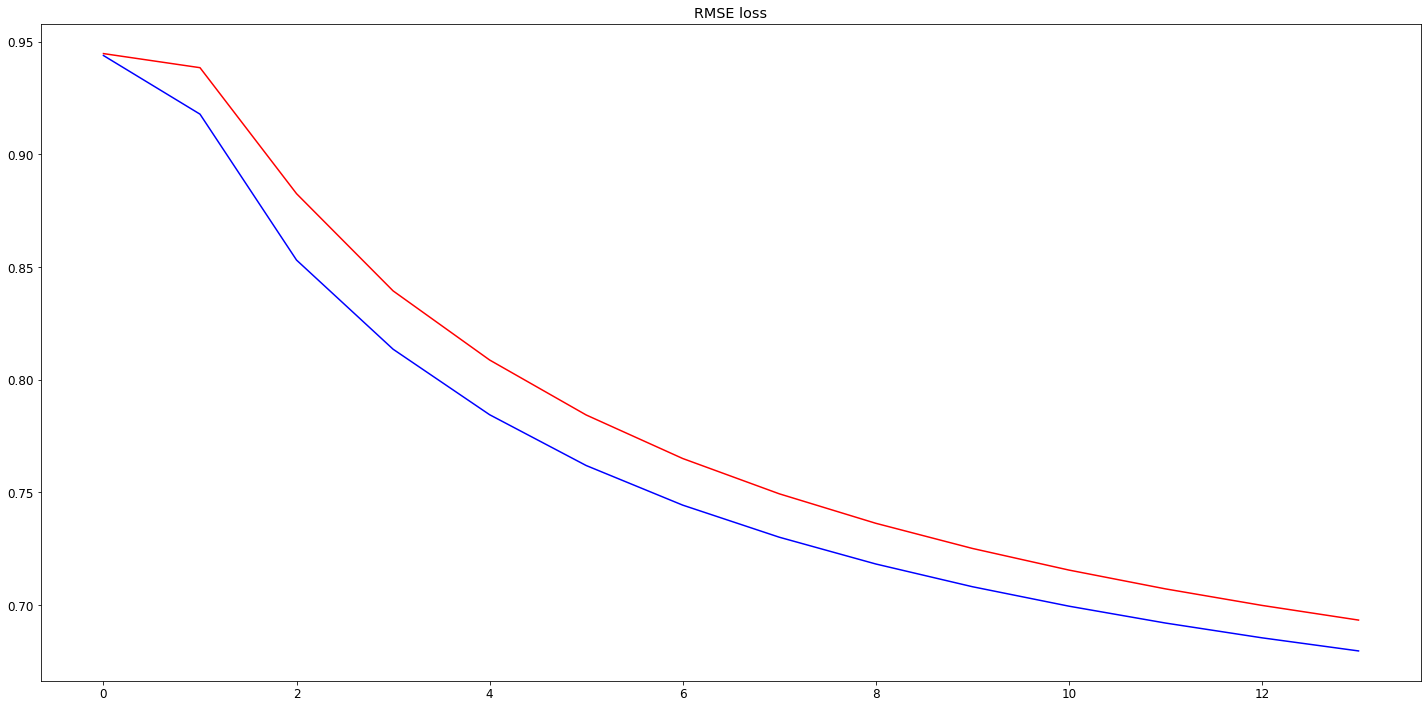

In [32]:
plot_train_vs_test(nmf_train_losses, nmf_test_losses, "RMSE loss")

### Reconstruct data

In [33]:
df_expressions_preds, df_expressions_true, reconstructed_data = engine.create_reconstructed_data(nmf_model, dataset, data, device)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


  (0, 3964)	1.0
  (0, 1760)	2.0
  (0, 8731)	1.0
  (0, 2402)	1.0
  (0, 6825)	1.0
  (0, 3744)	1.0
  (0, 3746)	1.0
  (0, 5969)	1.0
  (0, 6350)	1.0
  (0, 1531)	1.0
  (0, 7469)	1.0
  (0, 4043)	1.0
  (0, 7871)	1.0
  (0, 4654)	1.0
  (0, 5184)	1.0
  (0, 3325)	1.0
  (0, 1186)	1.0
  (0, 3164)	1.0
  (0, 3072)	1.0
  (0, 6163)	1.0
  (0, 5250)	1.0
  (0, 4762)	1.0
  (0, 4660)	1.0
  (0, 5647)	1.0
  (0, 5746)	2.0
  :	:
  (1184, 4463)	3.0
  (1184, 7282)	1.0
  (1184, 5687)	11.0
  (1184, 1418)	1.0
  (1184, 6630)	1.0
  (1184, 6555)	2.0
  (1184, 3306)	6.0
  (1184, 6458)	1.0
  (1184, 8425)	24.0
  (1184, 6224)	3.0
  (1184, 3484)	1.0
  (1184, 9521)	196.0
  (1184, 9522)	125.0
  (1184, 9517)	891.0
  (1184, 9518)	499.0
  (1184, 9516)	3.0
  (1184, 9515)	524.0
  (1184, 9519)	682.0
  (1184, 9523)	42.0
  (1184, 9525)	6.0
  (1184, 9524)	260.0
  (1184, 9526)	36.0
  (1184, 9520)	295.0
  (1184, 8952)	1.0
  (1184, 138)	2.0 [[0.06651006 0.04572492 0.02217894 ... 0.54423964 1.36650395 0.        ]
 [0.40375966 0.26928389 0.2

/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


### Cluster and plot reconstructed data

Normalization step is finished in adata.X
PCA is done! Generated in adata.obsm['X_pca'], adata.uns['pca'] and adata.varm['PCs']
Applying Kmeans clustering ...
Kmeans clustering is done! The labels are stored in adata.obs["kmeans"]


<Figure size 1440x720 with 0 Axes>

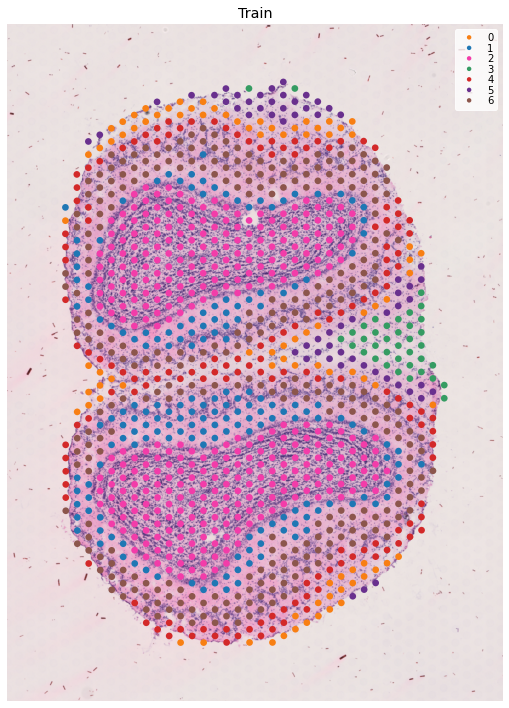

In [34]:
engine.cluster_reconstructed_data(reconstructed_data)

## NMF- Random spots + smoothing of 2 spots away + remove only highest distanced pixel

In [35]:
dataset, data = load_visium_data(dataset_name, min_cells=177, min_counts=10, smooth_type='mean_wrt_to_neighbors_tiles_means_remove_highest_distance')

/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/content/drive/MyDrive/Studies 2/Year 2/Final Project/project_git_repo/code/load_data.py:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spot_expression[f'{neighbor_name[0]}_{row_ind}_{col_ind}'] = top_left_spot_data_expressions['expression'].values.astype(float)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

In [36]:
params = {
    'learning_rate': 0.1,
    'optimizer': "SGD",
    'latent_dim': 40,
    'batch_size': 128
}

In [37]:
number_of_spots = data.n_obs
number_of_genes = data.n_vars
nmf_model = NMF(data.n_vars, data.n_obs, params)

In [38]:
nmf_execute = engine(model = nmf_model,
                    model_name = 'NMF',
                    params = params,
                    epochs = 300,
                    criterion = RMSELossWithoutZeros(),
                    dl_train = dataset.dl_train,
                    dl_valid = dataset.dl_valid,
                    dl_test = dataset.dl_test,
                    device = device)

NMF(
  (embedding_genes): Embedding(9529, 40)
  (embedding_spots): Embedding(1186, 40)
)


In [39]:
nmf_train_losses, nmf_test_losses = nmf_execute.execute()

Train epoch 0/300: 100%|██████████| 71449/71449 [05:05<00:00, 233.51it/s]


Epoch #0 Train Loss: 0.8909748139457863
Epoch #0 Validation Loss: 0.8897506613378983


Train epoch 1/300: 100%|██████████| 71449/71449 [05:32<00:00, 214.66it/s]


Epoch #1 Train Loss: 0.8745901179595859
Epoch #1 Validation Loss: 0.8216745654610668


Train epoch 2/300: 100%|██████████| 71449/71449 [05:42<00:00, 208.51it/s]


Epoch #2 Train Loss: 0.765842719350069
Epoch #2 Validation Loss: 0.7106048149895866


Train epoch 3/300: 100%|██████████| 71449/71449 [05:47<00:00, 205.40it/s]


Epoch #3 Train Loss: 0.6929960227811778
Epoch #3 Validation Loss: 0.6468180846804431


Train epoch 4/300: 100%|██████████| 71449/71449 [05:57<00:00, 199.94it/s]


Epoch #4 Train Loss: 0.6435377509507472
Epoch #4 Validation Loss: 0.6021418261410868


Train epoch 5/300: 100%|██████████| 71449/71449 [05:52<00:00, 202.52it/s]


Epoch #5 Train Loss: 0.6057137869206042
Epoch #5 Validation Loss: 0.5686243070279385


Train epoch 6/300: 100%|██████████| 71449/71449 [05:53<00:00, 202.21it/s]


Epoch #6 Train Loss: 0.5765383558522982
Epoch #6 Validation Loss: 0.5431593404215379


Train epoch 7/300: 100%|██████████| 71449/71449 [05:56<00:00, 200.31it/s]


Epoch #7 Train Loss: 0.5534203347591689
Epoch #7 Validation Loss: 0.5229743172394579


Train epoch 8/300: 100%|██████████| 71449/71449 [06:03<00:00, 196.56it/s]


Epoch #8 Train Loss: 0.5344755179943802
Epoch #8 Validation Loss: 0.5064344766147059


Train epoch 9/300: 100%|██████████| 71449/71449 [06:07<00:00, 194.26it/s]


Epoch #9 Train Loss: 0.5186098544184212
Epoch #9 Validation Loss: 0.49263824576805737


Train epoch 10/300: 100%|██████████| 71449/71449 [06:16<00:00, 189.80it/s]


Epoch #10 Train Loss: 0.505154167995778
Epoch #10 Validation Loss: 0.48098567448765644


Train epoch 11/300: 100%|██████████| 71449/71449 [06:41<00:00, 177.76it/s]


Epoch #11 Train Loss: 0.49360683500255625
Epoch #11 Validation Loss: 0.4710050237835647


Train epoch 12/300: 100%|██████████| 71449/71449 [07:04<00:00, 168.26it/s]


Epoch #12 Train Loss: 0.4835752736348924
Epoch #12 Validation Loss: 0.46234911017924174
Early stopping


### Plot train and test vs epochs

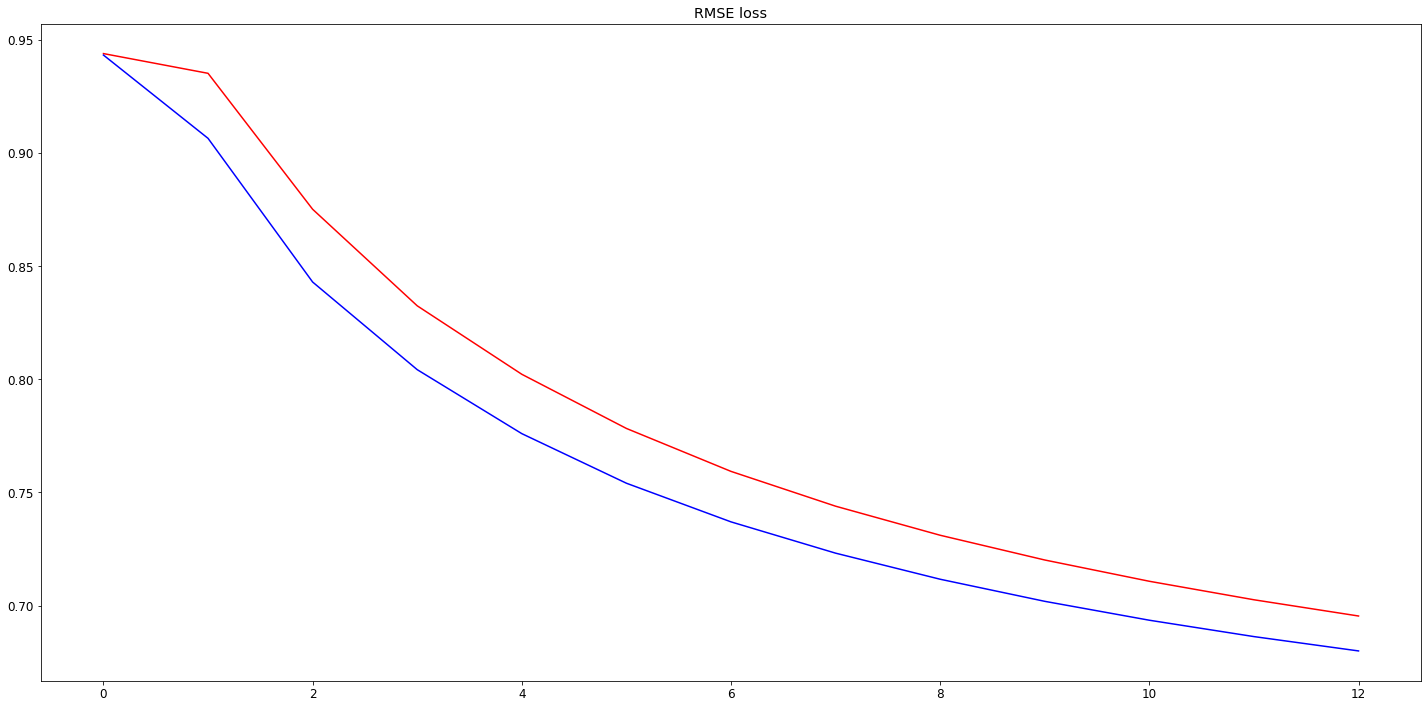

In [40]:
plot_train_vs_test(nmf_train_losses, nmf_test_losses, "RMSE loss")

### Reconstruct data

In [41]:
df_expressions_preds, df_expressions_true, reconstructed_data = engine.create_reconstructed_data(nmf_model, dataset, data, device)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


  (0, 3964)	1.0
  (0, 1760)	2.0
  (0, 8731)	1.0
  (0, 2402)	1.0
  (0, 6825)	1.0
  (0, 3744)	1.0
  (0, 3746)	1.0
  (0, 5969)	1.0
  (0, 6350)	1.0
  (0, 1531)	1.0
  (0, 7469)	1.0
  (0, 4043)	1.0
  (0, 7871)	1.0
  (0, 4654)	1.0
  (0, 5184)	1.0
  (0, 3325)	1.0
  (0, 1186)	1.0
  (0, 3164)	1.0
  (0, 3072)	1.0
  (0, 6163)	1.0
  (0, 5250)	1.0
  (0, 4762)	1.0
  (0, 4660)	1.0
  (0, 5647)	1.0
  (0, 5746)	2.0
  :	:
  (1184, 4463)	3.0
  (1184, 7282)	1.0
  (1184, 5687)	11.0
  (1184, 1418)	1.0
  (1184, 6630)	1.0
  (1184, 6555)	2.0
  (1184, 3306)	6.0
  (1184, 6458)	1.0
  (1184, 8425)	24.0
  (1184, 6224)	3.0
  (1184, 3484)	1.0
  (1184, 9521)	196.0
  (1184, 9522)	125.0
  (1184, 9517)	891.0
  (1184, 9518)	499.0
  (1184, 9516)	3.0
  (1184, 9515)	524.0
  (1184, 9519)	682.0
  (1184, 9523)	42.0
  (1184, 9525)	6.0
  (1184, 9524)	260.0
  (1184, 9526)	36.0
  (1184, 9520)	295.0
  (1184, 8952)	1.0
  (1184, 138)	2.0 [[0.06409104 0.06442136 0.         ... 0.53606528 1.3457098  0.03651864]
 [0.41566631 0.33512181 0.2

/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


### Cluster and plot reconstructed data

Normalization step is finished in adata.X
PCA is done! Generated in adata.obsm['X_pca'], adata.uns['pca'] and adata.varm['PCs']
Applying Kmeans clustering ...
Kmeans clustering is done! The labels are stored in adata.obs["kmeans"]


<Figure size 1440x720 with 0 Axes>

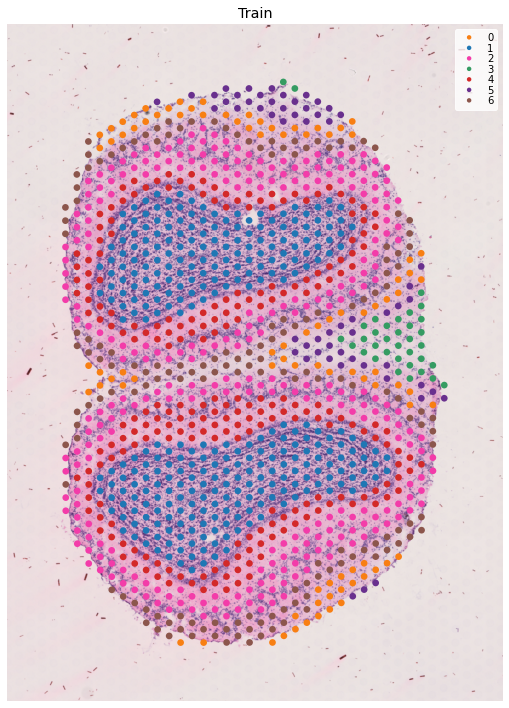

In [42]:
engine.cluster_reconstructed_data(reconstructed_data)

## NMF- Random spots + smoothing of 2 spots away + only pixels differs up to 25 + tile of size 20

In [43]:
dataset, data = load_visium_data(dataset_name, min_cells=177, min_counts=10, smooth_type='mean_wrt_to_neighbors_tiles_means')

/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/content/drive/MyDrive/Studies 2/Year 2/Final Project/project_git_repo/code/load_data.py:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spot_expression[f'{neighbor_name[0]}_{row_ind}_{col_ind}'] = top_left_spot_data_expressions['expression'].values.astype(float)
/content/drive/MyDrive/Studies 2/Year 2/Final Project/project_git_repo/code/load_data.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

In [44]:
params = {
    'learning_rate': 0.1,
    'optimizer': "SGD",
    'latent_dim': 40,
    'batch_size': 128
}

In [45]:
number_of_spots = data.n_obs
number_of_genes = data.n_vars
nmf_model = NMF(data.n_vars, data.n_obs, params)

In [46]:
nmf_execute = engine(model = nmf_model,
                    model_name = 'NMF',
                    params = params,
                    epochs = 300,
                    criterion = RMSELossWithoutZeros(),
                    dl_train = dataset.dl_train,
                    dl_valid = dataset.dl_valid,
                    dl_test = dataset.dl_test,
                    device = device)

NMF(
  (embedding_genes): Embedding(9529, 40)
  (embedding_spots): Embedding(1186, 40)
)


In [47]:
nmf_train_losses, nmf_test_losses = nmf_execute.execute()

Train epoch 0/300: 100%|██████████| 71449/71449 [05:32<00:00, 214.87it/s]


Epoch #0 Train Loss: 0.8923951094447632
Epoch #0 Validation Loss: 0.8916288458838376


Train epoch 1/300: 100%|██████████| 71449/71449 [05:40<00:00, 209.68it/s]


Epoch #1 Train Loss: 0.8808341246454643
Epoch #1 Validation Loss: 0.8438829749821621


Train epoch 2/300: 100%|██████████| 71449/71449 [05:52<00:00, 202.97it/s]


Epoch #2 Train Loss: 0.7794587589755679
Epoch #2 Validation Loss: 0.7288407060263704


Train epoch 3/300: 100%|██████████| 71449/71449 [05:58<00:00, 199.33it/s]


Epoch #3 Train Loss: 0.7050707750652024
Epoch #3 Validation Loss: 0.6625859829672401


Train epoch 4/300: 100%|██████████| 71449/71449 [06:11<00:00, 192.46it/s]


Epoch #4 Train Loss: 0.6542299894944061
Epoch #4 Validation Loss: 0.6157301068130033


Train epoch 5/300: 100%|██████████| 71449/71449 [06:10<00:00, 192.59it/s]


Epoch #5 Train Loss: 0.6152612025255497
Epoch #5 Validation Loss: 0.5808183174704302


Train epoch 6/300: 100%|██████████| 71449/71449 [06:27<00:00, 184.60it/s]


Epoch #6 Train Loss: 0.5852884650138923
Epoch #6 Validation Loss: 0.5542743526153459


Train epoch 7/300: 100%|██████████| 71449/71449 [06:39<00:00, 178.99it/s]


Epoch #7 Train Loss: 0.5615070536572925
Epoch #7 Validation Loss: 0.5331918143167977


Train epoch 8/300: 100%|██████████| 71449/71449 [06:53<00:00, 172.72it/s]


Epoch #8 Train Loss: 0.541998482779325
Epoch #8 Validation Loss: 0.5159110300887341


Train epoch 9/300: 100%|██████████| 71449/71449 [07:01<00:00, 169.44it/s]


Epoch #9 Train Loss: 0.5256714730952063
Epoch #9 Validation Loss: 0.5015135797545847


Train epoch 10/300: 100%|██████████| 71449/71449 [07:12<00:00, 165.01it/s]


Epoch #10 Train Loss: 0.5118334585260085
Epoch #10 Validation Loss: 0.48935395464083264


Train epoch 11/300: 100%|██████████| 71449/71449 [07:19<00:00, 162.73it/s]


Epoch #11 Train Loss: 0.49995498832176516
Epoch #11 Validation Loss: 0.47893588045046226


Train epoch 12/300: 100%|██████████| 71449/71449 [07:15<00:00, 163.88it/s]


Epoch #12 Train Loss: 0.48962938893109276
Epoch #12 Validation Loss: 0.46988735877177773


Train epoch 13/300: 100%|██████████| 71449/71449 [07:39<00:00, 155.45it/s]


Epoch #13 Train Loss: 0.4805523732119384
Epoch #13 Validation Loss: 0.46194073172596545
Early stopping


### Plot train and test vs epochs

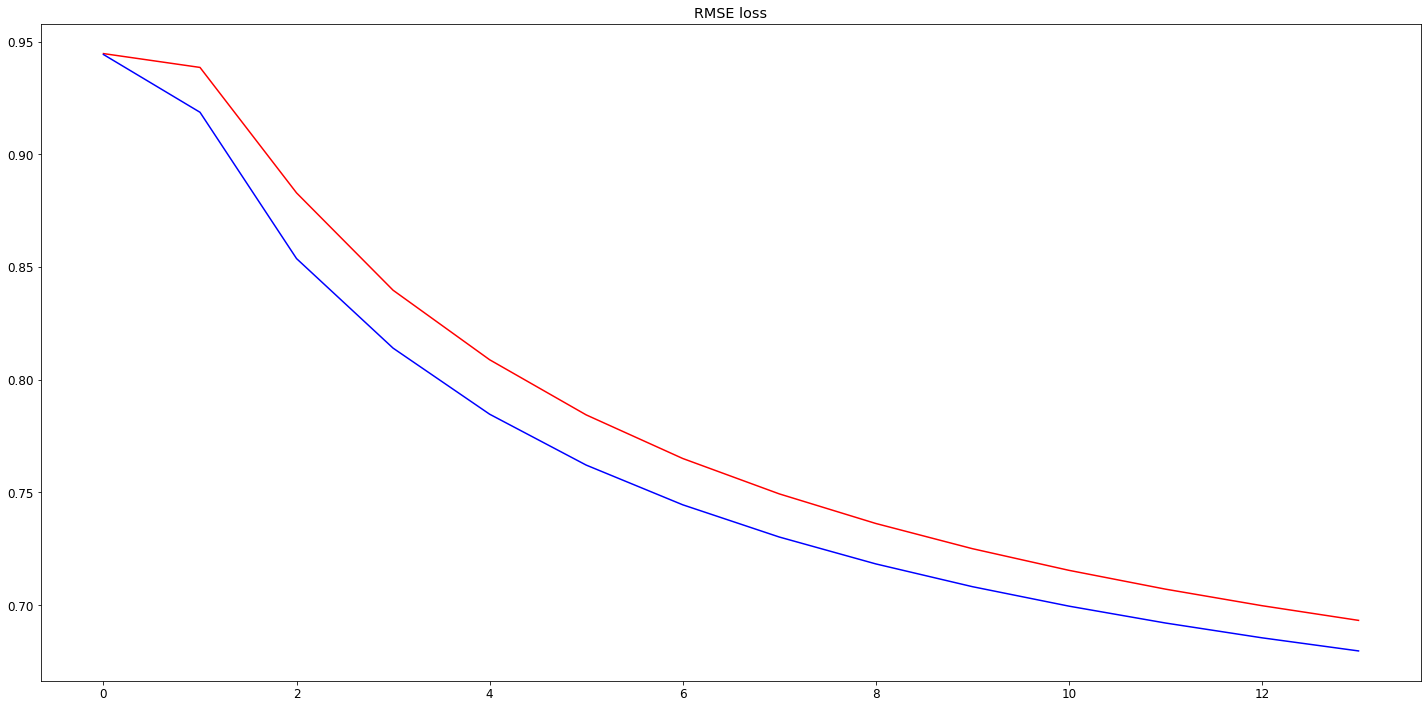

In [48]:
plot_train_vs_test(nmf_train_losses, nmf_test_losses, "RMSE loss")

### Reconstruct data

In [49]:
df_expressions_preds, df_expressions_true, reconstructed_data = engine.create_reconstructed_data(nmf_model, dataset, data, device)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


  (0, 3964)	1.0
  (0, 1760)	2.0
  (0, 8731)	1.0
  (0, 2402)	1.0
  (0, 6825)	1.0
  (0, 3744)	1.0
  (0, 3746)	1.0
  (0, 5969)	1.0
  (0, 6350)	1.0
  (0, 1531)	1.0
  (0, 7469)	1.0
  (0, 4043)	1.0
  (0, 7871)	1.0
  (0, 4654)	1.0
  (0, 5184)	1.0
  (0, 3325)	1.0
  (0, 1186)	1.0
  (0, 3164)	1.0
  (0, 3072)	1.0
  (0, 6163)	1.0
  (0, 5250)	1.0
  (0, 4762)	1.0
  (0, 4660)	1.0
  (0, 5647)	1.0
  (0, 5746)	2.0
  :	:
  (1184, 4463)	3.0
  (1184, 7282)	1.0
  (1184, 5687)	11.0
  (1184, 1418)	1.0
  (1184, 6630)	1.0
  (1184, 6555)	2.0
  (1184, 3306)	6.0
  (1184, 6458)	1.0
  (1184, 8425)	24.0
  (1184, 6224)	3.0
  (1184, 3484)	1.0
  (1184, 9521)	196.0
  (1184, 9522)	125.0
  (1184, 9517)	891.0
  (1184, 9518)	499.0
  (1184, 9516)	3.0
  (1184, 9515)	524.0
  (1184, 9519)	682.0
  (1184, 9523)	42.0
  (1184, 9525)	6.0
  (1184, 9524)	260.0
  (1184, 9526)	36.0
  (1184, 9520)	295.0
  (1184, 8952)	1.0
  (1184, 138)	2.0 [[0.0539709  0.07109699 0.02726644 ... 0.57127535 1.41290569 0.06249543]
 [0.41394696 0.30953601 0.3

/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


### Cluster and plot reconstructed data

Normalization step is finished in adata.X
PCA is done! Generated in adata.obsm['X_pca'], adata.uns['pca'] and adata.varm['PCs']
Applying Kmeans clustering ...
Kmeans clustering is done! The labels are stored in adata.obs["kmeans"]


<Figure size 1440x720 with 0 Axes>

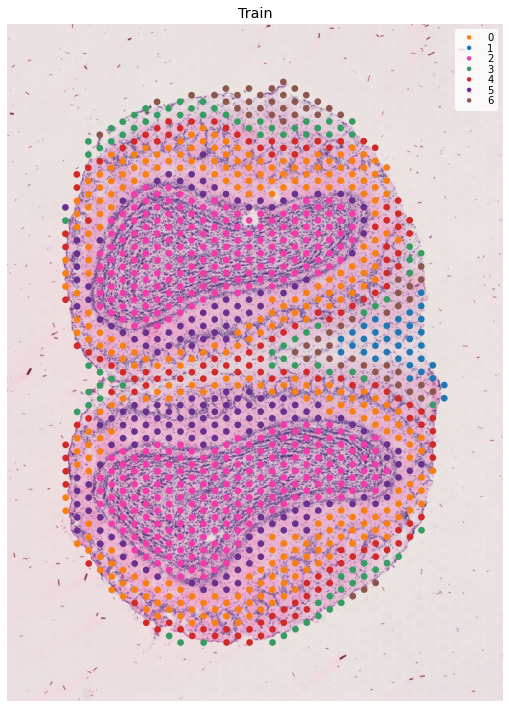

In [50]:
engine.cluster_reconstructed_data(reconstructed_data)

## Train edge detection classifier

In [ ]:
from load_data import load_edge_detection_data
load_edge_detection_data(dataset_name)

(<torch.utils.data.dataloader.DataLoader at 0x7f35810fff70>,
 <torch.utils.data.dataloader.DataLoader at 0x7f35810ff700>)

# NN- MF

In [ ]:
%load_ext autoreload
%autoreload 2
from models import NNMF
from torch import nn

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1 Linear Layer

In [ ]:
params = {
    'learning_rate': 0.001,
    'optimizer': "RMSprop",
    'latent_dim': 20,
    'batch_size': BATCH_SIZE,
    'layers_sizes': [(20,10)]
}

In [ ]:
nnmf_model = NNMF(number_of_genes, number_of_spots, params, DEVICE)

In [ ]:
train_nnmf = engine(model = nnmf_model,
                    model_name = 'NNMF',
                    params = params,
                    epochs = 10,
                    dl_train = dataset.dl_train_top_genes,
                    dl_test = dataset.dl_test_top_genes,
                    device = DEVICE)

NNMF(
  (embedding_genes): Embedding(32286, 20)
  (embedding_spots): Embedding(1186, 20)
  (linear_layers): Sequential(
    (0): Linear(in_features=20, out_features=10, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=10, out_features=1, bias=True)
  )
)


In [ ]:
nnmf_train_losses, nnmf_test_losses = train_nnmf.execute()

Train epoch 0/10: 100%|██████████████████████████████████████████████████████████████| 750/750 [00:12<00:00, 60.39it/s]


Epoch #0 Train Loss: 1.715077950765421
Epoch #0 Test Loss: 1.1432739220273862


Train epoch 1/10: 100%|██████████████████████████████████████████████████████████████| 750/750 [00:12<00:00, 59.48it/s]


Epoch #1 Train Loss: 1.4558057859680813
Epoch #1 Test Loss: 1.1426385038114741


Train epoch 2/10: 100%|██████████████████████████████████████████████████████████████| 750/750 [00:12<00:00, 58.66it/s]


Epoch #2 Train Loss: 1.3583749468207718
Epoch #2 Test Loss: 1.1421958867106463


Train epoch 3/10: 100%|██████████████████████████████████████████████████████████████| 750/750 [00:12<00:00, 59.22it/s]


Epoch #3 Train Loss: 1.3069062600394739
Epoch #3 Test Loss: 1.1418163653589695


Train epoch 4/10: 100%|██████████████████████████████████████████████████████████████| 750/750 [00:12<00:00, 59.97it/s]


Epoch #4 Train Loss: 1.2750337305282085
Epoch #4 Test Loss: 1.1420464775417325


Train epoch 5/10: 100%|██████████████████████████████████████████████████████████████| 750/750 [00:12<00:00, 60.69it/s]


Epoch #5 Train Loss: 1.2533327516711268
Epoch #5 Test Loss: 1.1421073479159147


Train epoch 6/10: 100%|██████████████████████████████████████████████████████████████| 750/750 [00:12<00:00, 60.12it/s]


Epoch #6 Train Loss: 1.2375957593478204
Epoch #6 Test Loss: 1.1420722943277333


Train epoch 7/10: 100%|██████████████████████████████████████████████████████████████| 750/750 [00:12<00:00, 59.55it/s]


Epoch #7 Train Loss: 1.2256633870287823
Epoch #7 Test Loss: 1.1419659700887672


Train epoch 8/10: 100%|██████████████████████████████████████████████████████████████| 750/750 [00:12<00:00, 60.43it/s]


Epoch #8 Train Loss: 1.2162969217632982
Epoch #8 Test Loss: 1.1419787936257435


Train epoch 9/10: 100%|██████████████████████████████████████████████████████████████| 750/750 [00:12<00:00, 60.14it/s]


Epoch #9 Train Loss: 1.2087504861272487
Epoch #9 Test Loss: 1.1419060227512068


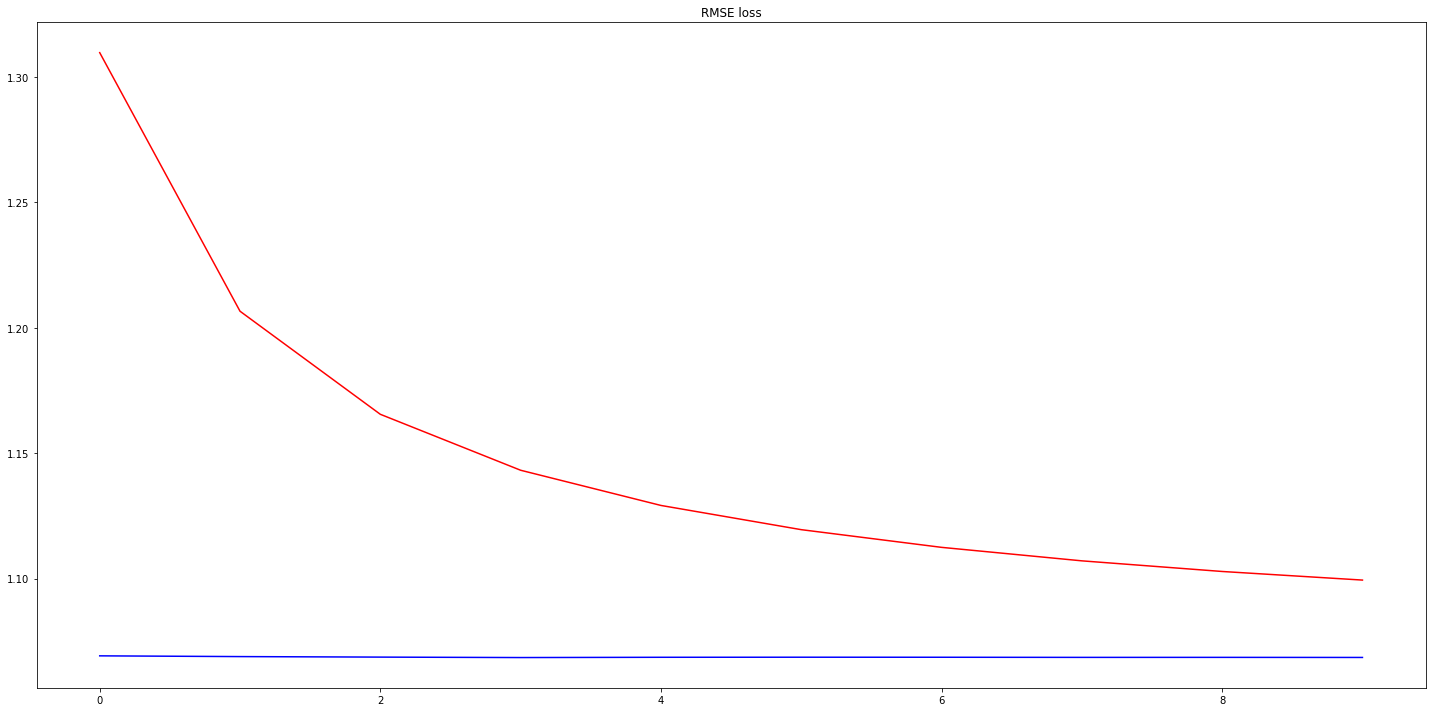

In [ ]:
plot_train_vs_test(nnmf_train_losses, nnmf_test_losses, "RMSE loss")

In [ ]:
df_expressions_preds, df_expressions_true, reconstructed_data = engine.create_reconstructed_data(nnmf_model, dataset, data, DEVICE)

  (0, 18)	5.0
  (0, 26)	2.0
  (0, 73)	2.0
  (0, 78)	3.0
  (0, 55)	2.0
  (0, 72)	1.0
  (0, 80)	3.0
  (0, 40)	2.0
  (0, 62)	1.0
  (0, 84)	1.0
  (0, 0)	1.0
  (0, 47)	1.0
  (0, 35)	2.0
  (0, 54)	2.0
  (0, 25)	3.0
  (0, 31)	2.0
  (0, 81)	2.0
  (0, 52)	1.0
  (0, 3)	2.0
  (0, 71)	1.0
  (0, 70)	2.0
  (0, 65)	1.0
  (0, 24)	1.0
  (0, 27)	7.0
  (0, 51)	2.0
  :	:
  (1184, 56)	23.0
  (1184, 49)	9.0
  (1184, 36)	15.0
  (1184, 7)	24.0
  (1184, 64)	18.0
  (1184, 9)	17.0
  (1184, 68)	20.0
  (1184, 44)	13.0
  (1184, 5)	13.0
  (1184, 10)	25.0
  (1184, 22)	24.0
  (1184, 16)	32.0
  (1184, 23)	34.0
  (1184, 37)	19.0
  (1184, 85)	24.0
  (1184, 95)	196.0
  (1184, 96)	125.0
  (1184, 91)	891.0
  (1184, 92)	499.0
  (1184, 90)	524.0
  (1184, 93)	682.0
  (1184, 97)	42.0
  (1184, 98)	260.0
  (1184, 99)	36.0
  (1184, 94)	295.0 [[list([3.1679160594940186]) list([3.1769323348999023])
  list([3.1682467460632324]) ... list([3.1713924407958984])
  list([3.18613600730896]) list([3.172372341156006])]
 [list([3.199940681457

ValueError: setting an array element with a sequence.

In [ ]:
plot_true_vs_reconstructed_histogram(df_expressions_true, df_expressions_preds)

In [ ]:
engine.cluster_reconstructed_data(reconstructed_data)

## 3 Linear Layers

In [ ]:
params = {
    'learning_rate': 0.001,
    'optimizer': "Adam",
    'latent_dim': 20,
    'batch_size': BATCH_SIZE,
    'layers_sizes': [(40,100), (100,50), (50,10)]
}

In [ ]:
nnmf_model = NNMF(number_of_genes, number_of_spots, params, DEVICE)

In [ ]:
train_nnmf = engine(model = nnmf_model,
                    model_name = 'NNMF',
                    params = params,
                    epochs = 10,
                    dl_train = dataset.dl_train_top_genes,
                    dl_test = dataset.dl_test_top_genes,
                    device = DEVICE)

In [ ]:
nnmf_train_losses, nnmf_test_losses = train_nnmf.execute()

In [ ]:
plot_train_vs_test(nnmf_train_losses, nnmf_test_losses, "RMSE loss")

In [ ]:
df_expressions_preds, df_expressions_true, reconstructed_data = engine.create_reconstructed_data(nnmf_model, dataset, data, DEVICE)

In [ ]:
plot_true_vs_reconstructed_histogram(df_expressions_true, df_expressions_preds)

In [ ]:
engine.cluster_reconstructed_data(reconstructed_data)

# NeuMF

In [ ]:
%load_ext autoreload
%autoreload 2
from models import NeuMF

In [ ]:
params = {
    'learning_rate': 0.001,
    'optimizer': "SGD",
    'latent_dim': 20,
    'batch_size': BATCH_SIZE,
    'layers_sizes': [40, 10]
}

In [ ]:
neumf_model = NeuMF(number_of_genes, number_of_spots, params, DEVICE)

In [ ]:
train_neumf = engine(model = neumf_model,
                    model_name = 'NeuMF',
                    params = params,
                    epochs = 5,
                    dl_train = dataset.dl_train_top_genes,
                    dl_test = dataset.dl_test_top_genes,
                    device = DEVICE)

In [ ]:
neumf_train_losses, neumf_test_losses = train_neumf.execute()

In [ ]:
plot_train_vs_test(neumf_train_losses, neumf_test_losses, "RMSE loss")

In [ ]:
df_expressions_preds, df_expressions_true, reconstructed_data = engine.create_reconstructed_data(neumf_model, dataset, data, DEVICE)

In [ ]:
plot_true_vs_reconstructed_histogram(df_expressions_true, df_expressions_preds)

In [ ]:
engine.cluster_reconstructed_data(reconstructed_data)